# AML 2404 - AI and ML Lab

## Project Name - *Automated Essay Scoring*

### Group members:

* ***Karan Thakkar (C0810504)***
* ***Nikita Soni (C0823341)***
* ***Sahana Gowda (C0814564)***
* ***Sai Sandeep Kumar Reddy Palle (C0817739)***

### Problem Statement:

#### *Given a set of 8 essays with manually graded score, build a model to predict the scores for the rest of the essays. Purpose is to create a platform that helps students prepare for their essay exams and assigments, without having to pay for the service.*

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import string
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

### Loading the data from CSV to DataFrame

In [4]:
set_2 = pd.read_csv('training_set_rel3.tsv', encoding = 'cp437', sep = '\t')
set_2.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Selecting only Essay set-2 data

In [6]:
set_2 = set_2[set_2.essay_set==2]
set_2 = set_2[['essay_set','essay','domain2_score']]
set_2.head(2)

,essay_set,essay,domain2_score
1783,2,Certain materials being removed from libraries...,4.0
1784,2,Write a persuasive essay to a newspaper reflec...,1.0


### Extracting No.of Sentences and No.of Words features from the Essay column

In [7]:
essay_list = set_2.essay.to_list()

In [8]:
sentences = []
num_sentences = []
num_words = []
for i in range(len(essay_list)):
    sentence = sent_tokenize(essay_list[i])
    sentences.append(sentence)
    num_sentences.append(len(sentence))
    words = len(word_tokenize(essay_list[i]))
    num_words.append(words)

In [9]:
set_2['number_of_words'] = num_words
set_2['number_of_sentences'] = num_sentences

In [11]:
set_2.head(2)

,essay_set,essay,domain2_score,number_of_words,number_of_sentences
1783,2,Certain materials being removed from libraries...,4.0,537,19
1784,2,Write a persuasive essay to a newspaper reflec...,1.0,178,3


In [12]:
sentences[1][1]

'Do you believe that certain should be removed i think so be no that yes i think should no person that in chager the book, music, movies, magazines, ect., that be no agure      why do i think if you need that please  think i no thank you please if  i need why do we if know that if i failure the this test i who need to graduate please the children allow to home please yes.'

In [15]:
errors = tool.check(sentences[1][1])
print(len(errors))
print(errors[0])
print(errors[1])

15
Offset 46, length 1, Rule ID: I_LOWERCASE
Message: The personal pronoun “I” should be uppercase.
Suggestion: I
... believe that certain should be removed i think so be no that yes i think should ...
                                           ^
Offset 72, length 1, Rule ID: I_LOWERCASE
Message: The personal pronoun “I” should be uppercase.
Suggestion: I
...ld be removed i think so be no that yes i think should no person that in chager t...
                                           ^


### Created Error_Score list and retrieved error score values of each essay with Language Tool Python and appended to the list

In [16]:
error_score = []
for i in range(len(sentences)):
    lang_error = 0
    for j in range(len(sentences[i])):
        errors = tool.check(sentences[i][j])
        lang_error += len(errors)
    error_score.append(lang_error)

In [20]:
set_2['error_score'] = error_score

In [21]:
set_2.head(2)

,essay_set,essay,domain2_score,number_of_words,number_of_sentences,error_score,error_score_sent%,error_score_word%
1783,2,Certain materials being removed from libraries...,4.0,537,19,10,0.526,0.019
1784,2,Write a persuasive essay to a newspaper reflec...,1.0,178,3,26,8.667,0.146


### Created error_score_sent% and error_score_word% features and appended them to DataFrame

In [22]:
set_2['error_score_sent%'] = round((set_2['error_score'] / set_2['number_of_sentences']),3)
set_2['error_score_word%'] = round((set_2['error_score'] / set_2['number_of_words']),3)

In [23]:
set_2.head(2)

,essay_set,essay,domain2_score,number_of_words,number_of_sentences,error_score,error_score_sent%,error_score_word%
1783,2,Certain materials being removed from libraries...,4.0,537,19,10,0.526,0.019
1784,2,Write a persuasive essay to a newspaper reflec...,1.0,178,3,26,8.667,0.146


In [24]:
# Get Numeric columns in the dataset
num_cols = set_2.columns[2:]
num_cols

Index(['domain2_score', 'number_of_words', 'number_of_sentences',
       'error_score', 'error_score_sent%', 'error_score_word%'],
      dtype='object')

### Checking the correlation of all numeric features on Heatmap

Text(0.5, 1.0, 'Correlation in essay set 2')

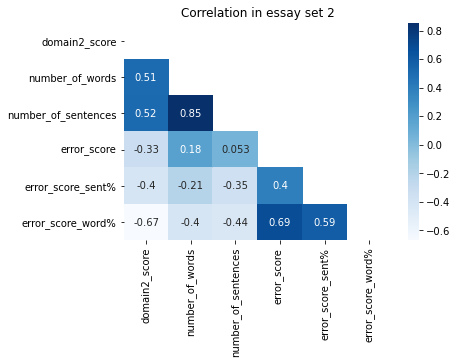

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(6,4))
sb.heatmap(set_2[num_cols].corr(),annot=True, mask=np.triu(set_2[num_cols].corr()),cmap="Blues")
plt.title("Correlation in essay set 2")

In [26]:
#type(set_2)
set_2.dtypes
# .unique()

essay_set                int64
essay                   object
domain2_score          float64
number_of_words          int64
number_of_sentences      int64
error_score              int64
error_score_sent%      float64
error_score_word%      float64
dtype: object

### Coverting data format of domain2_score from float to int

In [27]:
set_2['domain2_score'] = set_2['domain2_score'].apply(lambda x: int(x))

In [28]:
set_2['domain2_score'].unique()

array([4, 1, 3, 2], dtype=int64)

In [29]:
num_cols = ['domain2_score', 'number_of_words',
       'number_of_sentences', 'error_score', 'error_score_sent%',
       'error_score_word%']

In [31]:
set_2_model =  set_2[num_cols]
set_2_model.head(2)

,domain2_score,number_of_words,number_of_sentences,error_score,error_score_sent%,error_score_word%
1783,4,537,19,10,0.526,0.019
1784,1,178,3,26,8.667,0.146


In [32]:
set_2_model.shape

(1800, 6)

## Deeplearning Model Implementation(ANN)

In [33]:
from __future__ import absolute_import, division

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


### Splitting the data into train and test datasets

In [34]:
train_dataset = set_2_model.sample(frac=0.8,random_state=0)
test_dataset = set_2_model.drop(train_dataset.index)

In [35]:
print(train_dataset.shape)
print(test_dataset.shape)

(1440, 6)
(360, 6)


### Plotting train_dataset data on pairplot

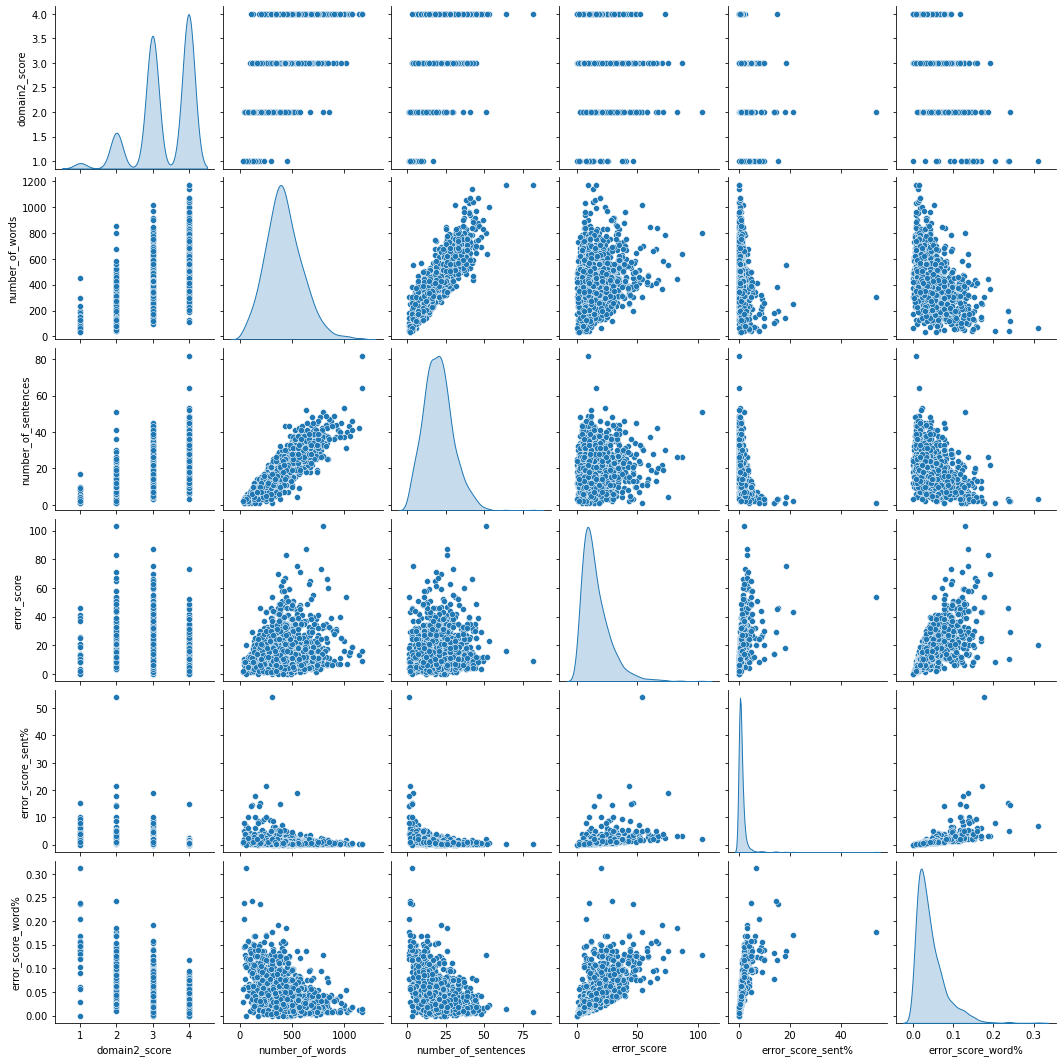

In [36]:
sns.pairplot(train_dataset,diag_kind = "kde")

### Seperating train and test labels from train and test datasets

In [37]:
train_labels = train_dataset.pop('domain2_score')
test_labels = test_dataset.pop('domain2_score')

In [29]:
train_labels

2380    3
2614    4
2957    3
2250    4
3505    4
       ..
2734    3
2927    3
3121    3
2820    3
3227    4
Name: domain2_score, Length: 1440, dtype: int64

In [38]:
test_labels

1794    3
1806    4
1807    3
1808    3
1811    3
       ..
3550    4
3553    2
3561    3
3564    3
3577    3
Name: domain2_score, Length: 360, dtype: int64

### Scaling train and test datasets with maximum_absolute_scaling

In [39]:
def maximum_absolute_scaling(df):
    for column in df.columns:
        df[column] = df[column]  / df[column].abs().max()
    return df

normed_train_data = maximum_absolute_scaling(train_dataset)
normed_test_data = maximum_absolute_scaling(test_dataset)

In [40]:
normed_train_data

,number_of_words,number_of_sentences,error_score,error_score_sent%,error_score_word%
2380,0.868713,0.378049,0.524272,0.032259,0.169872
2614,0.531969,0.439024,0.077670,0.004111,0.041667
2957,0.228474,0.085366,0.038835,0.010574,0.048077
2250,0.345269,0.207317,0.155340,0.017426,0.128205
3505,0.548167,0.378049,0.058252,0.003593,0.028846
...,...,...,...,...,...
2734,0.289003,0.170732,0.155340,0.021167,0.150641
2927,0.144928,0.085366,0.135922,0.037037,0.262821
3121,0.294118,0.317073,0.058252,0.004278,0.054487
2820,0.642796,0.475610,0.310680,0.015204,0.134615


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.metrics import accuracy_score

### Implementing ANN model with 7 layers

In [42]:
ann = Sequential([
                         Flatten(input_shape=[len(train_dataset.keys())]),
                         Dense(3000, activation='relu'),
                         Dense(1000, activation='relu'),
                         Dense(712, activation='relu'),
                         Dense(256, activation='relu'),
                         Dense(128, activation='relu'),
                         Dense(64, activation='relu'),
                         Dense(5, activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_hist = ann.fit(train_dataset, train_labels, epochs=10, batch_size=32,validation_data=(test_dataset,test_labels))

Epoch 1/10
45/45 [==============================] - 3s 54ms/step - loss: 1.5345 - accuracy: 0.5215 - val_loss: 1.4516 - val_accuracy: 0.4889
Epoch 2/10
45/45 [==============================] - 2s 42ms/step - loss: 1.3965 - accuracy: 0.4722 - val_loss: 1.3232 - val_accuracy: 0.4806
Epoch 3/10
45/45 [==============================] - 2s 51ms/step - loss: 1.2855 - accuracy: 0.4701 - val_loss: 1.2168 - val_accuracy: 0.4806
Epoch 4/10
45/45 [==============================] - 2s 41ms/step - loss: 1.1985 - accuracy: 0.4701 - val_loss: 1.1383 - val_accuracy: 0.4806
Epoch 5/10
45/45 [==============================] - 2s 42ms/step - loss: 1.1388 - accuracy: 0.4701 - val_loss: 1.0871 - val_accuracy: 0.4806
Epoch 6/10
45/45 [==============================] - 2s 50ms/step - loss: 1.1009 - accuracy: 0.4701 - val_loss: 1.0540 - val_accuracy: 0.4806
Epoch 7/10
45/45 [==============================] - 2s 50ms/step - loss: 1.0748 - accuracy: 0.4701 - val_loss: 1.0307 - val_accuracy: 0.4806
Epoch 8/10
45

### Evaluating the ANN model with 10 Epochs

In [43]:
ann.evaluate(test_dataset,test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 0.9787 - accuracy: 0.4806


[0.9786971807479858, 0.48055556416511536]

### Plotting loss and accuracy of data at each epoch

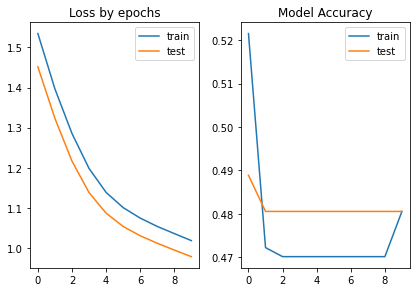

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout()

plt.subplot(121)
plt.title("Loss by epochs")
plt.plot(ann_hist.history['loss'], label='train')
plt.plot(ann_hist.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("Model Accuracy")
plt.plot(ann_hist.history['accuracy'], label='train')
plt.plot(ann_hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Reducing the number of layers to reduce overfittng

In [46]:
ann = Sequential([
                         Flatten(input_shape=[len(train_dataset.keys())]),
                         Dense(3000, activation='relu'),
                         Dense(1000, activation='relu'),
#                          Dense(712, activation='relu'),
                         Dense(256, activation='relu'),
#                          Dense(128, activation='relu'),
                         Dense(64, activation='relu'),
                         Dense(5, activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_hist = ann.fit(train_dataset, train_labels, epochs=10, batch_size=32,validation_data=(test_dataset,test_labels))

Epoch 1/10
45/45 [==============================] - 2s 31ms/step - loss: 1.5459 - accuracy: 0.4528 - val_loss: 1.4760 - val_accuracy: 0.4806
Epoch 2/10
45/45 [==============================] - 1s 27ms/step - loss: 1.4191 - accuracy: 0.4701 - val_loss: 1.3510 - val_accuracy: 0.4806
Epoch 3/10
45/45 [==============================] - 1s 27ms/step - loss: 1.3095 - accuracy: 0.4701 - val_loss: 1.2459 - val_accuracy: 0.4806
Epoch 4/10
45/45 [==============================] - 1s 27ms/step - loss: 1.2169 - accuracy: 0.4701 - val_loss: 1.1584 - val_accuracy: 0.4806
Epoch 5/10
45/45 [==============================] - 1s 27ms/step - loss: 1.1420 - accuracy: 0.4701 - val_loss: 1.0877 - val_accuracy: 0.4806
Epoch 6/10
45/45 [==============================] - 1s 30ms/step - loss: 1.0850 - accuracy: 0.4889 - val_loss: 1.0379 - val_accuracy: 0.4833
Epoch 7/10
45/45 [==============================] - 1s 28ms/step - loss: 1.0449 - accuracy: 0.4896 - val_loss: 1.0022 - val_accuracy: 0.5694
Epoch 8/10
45

### Evaluating the ANN model with 10 Epochs by reducing the number of layers

In [47]:
ann.evaluate(test_dataset,test_labels)

12/12 [==============================] - 0s 10ms/step - loss: 0.9341 - accuracy: 0.5917


[0.9341374039649963, 0.5916666388511658]

### Plotting loss and accuracy of data at each epoch

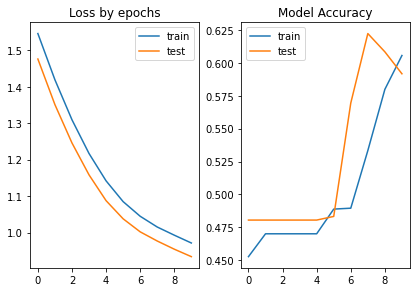

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout()

plt.subplot(121)
plt.title("Loss by epochs")
plt.plot(ann_hist.history['loss'], label='train')
plt.plot(ann_hist.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("Model Accuracy")
plt.plot(ann_hist.history['accuracy'], label='train')
plt.plot(ann_hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**With the current parameter settings, we found that the accuracy of our ANN model for essay set 2 is 59%. To increase the accuracy we implemented the model to run with more number of epochs(30)**

### Build a model with Reduce layers and increased Epochs

In [49]:
ann = Sequential([
                         Flatten(input_shape=[len(train_dataset.keys())]),
                         Dense(3000, activation='relu'),
                         Dense(1000, activation='relu'),
#                          Dense(712, activation='relu'),
                         Dense(256, activation='relu'),
#                          Dense(128, activation='relu'),
                         Dense(64, activation='relu'),
                         Dense(5, activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_hist1 = ann.fit(train_dataset, train_labels, epochs=30, batch_size=32,validation_data=(test_dataset,test_labels))

Epoch 1/30
45/45 [==============================] - 3s 47ms/step - loss: 1.4840 - accuracy: 0.4875 - val_loss: 1.3624 - val_accuracy: 0.4806
Epoch 2/30
45/45 [==============================] - 2s 35ms/step - loss: 1.2878 - accuracy: 0.4958 - val_loss: 1.1931 - val_accuracy: 0.4806
Epoch 3/30
45/45 [==============================] - 2s 34ms/step - loss: 1.1570 - accuracy: 0.4701 - val_loss: 1.0873 - val_accuracy: 0.4806 - accu
Epoch 4/30
45/45 [==============================] - 2s 39ms/step - loss: 1.0815 - accuracy: 0.4750 - val_loss: 1.0306 - val_accuracy: 0.4806
Epoch 5/30
45/45 [==============================] - 2s 38ms/step - loss: 1.0416 - accuracy: 0.4708 - val_loss: 0.9996 - val_accuracy: 0.5472
Epoch 6/30
45/45 [==============================] - 2s 36ms/step - loss: 1.0176 - accuracy: 0.5174 - val_loss: 0.9781 - val_accuracy: 0.5333
Epoch 7/30
45/45 [==============================] - 2s 37ms/step - loss: 0.9990 - accuracy: 0.5375 - val_loss: 0.9612 - val_accuracy: 0.5278
Epoch 

### Evaluating the ANN model with 30 Epochs and reduced number of layers

In [50]:
ann.evaluate(test_dataset,test_labels)

12/12 [==============================] - 0s 11ms/step - loss: 0.7396 - accuracy: 0.6778


[0.7396301031112671, 0.6777777671813965]

### Plotting loss and accuracy of data at each epoch

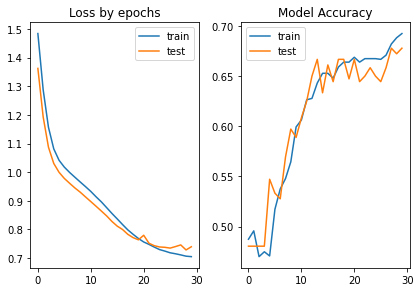

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout()

plt.subplot(121)
plt.title("Loss by epochs")
plt.plot(ann_hist1.history['loss'], label='train')
plt.plot(ann_hist1.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("Model Accuracy")
plt.plot(ann_hist1.history['accuracy'], label='train')
plt.plot(ann_hist1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**We see a continuos decrease in loos of the model, however the validation accuracy is very staggered in nature but still it continues to increase by increase in the number of epochs. So we deicded to implement this model for all essay sets before working on any further improvement.**

## Working on all Essay sets with same features extracted for Essay Set -2

In [52]:
data = pd.read_csv('training_set_rel3.tsv', encoding = 'cp437', sep = '\t')
data.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

### Filtering only required columns from the DataFrame

In [54]:
data = data[['essay_set','essay','domain1_score','domain2_score']]
data.head()

,essay_set,essay,domain1_score,domain2_score
0,1,"Dear local newspaper, I think effects computer...",8,NaN
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN


### Copying the data from Domain_2 score to Domain_1 score for Essay_set 2

**Domain 2 score is the score of the essay based on the grammatical and spelling mistakes made in the essay answer. Hence we decided to take domain 2 score as our target variable where ever it is present in the data so that our error score feature could add more value to the model.**

In [56]:
data['domain1_score'] = data.apply(lambda x: x['domain2_score'] if x['essay_set'] == 2 else x['domain1_score'], axis=1)

In [57]:
data.head(2)

,essay_set,essay,domain1_score,domain2_score
0,1,"Dear local newspaper, I think effects computer...",8.0,NaN
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,NaN


In [58]:
data = data.drop(['domain2_score'],axis=1)

In [59]:
data.head(2)

,essay_set,essay,domain1_score
0,1,"Dear local newspaper, I think effects computer...",8.0
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0


In [60]:
essay_list = data.essay.to_list()

### Creating No.of Words and No.Sentences features from Essay

In [61]:
sentences = []
num_sentences = []
num_words = []
for i in range(len(essay_list)):
    sentence = sent_tokenize(essay_list[i])
    sentences.append(sentence)
    num_sentences.append(len(sentence))
    words = len(word_tokenize(essay_list[i]))
    num_words.append(words)

In [65]:
data['number_of_words'] = num_words
data['number_of_sentences'] = num_sentences

In [63]:
data.head(2)

,essay_set,essay,domain1_score,number_of_words,number_of_sentences
0,1,"Dear local newspaper, I think effects computer...",8.0,386,16
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,464,20


### Creating Error score percentage features on words and sentences and appending to DataFrame

In [64]:
error_score = []
for i in range(len(sentences)):
    lang_error = 0
    for j in range(len(sentences[i])):
        errors = tool.check(sentences[i][j])
        lang_error += len(errors)
    error_score.append(lang_error)

In [66]:
data['error_score'] = error_score

In [67]:
data['error_score_sent%'] = round((data['error_score'] / data['number_of_sentences']),3)
data['error_score_word%'] = round((data['error_score'] / data['number_of_words']),3)

In [68]:
num_cols = ['domain1_score', 'number_of_words',
       'number_of_sentences', 'error_score', 'error_score_sent%',
       'error_score_word%']

In [73]:
data.head(2)

,essay_set,essay,domain1_score,number_of_words,number_of_sentences,error_score,error_score_sent%,error_score_word%
0,1,"Dear local newspaper, I think effects computer...",8,386,16,17,1.062,0.044
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,464,20,25,1.250,0.054


In [70]:
data['domain1_score'] = data['domain1_score'].apply(lambda x: int(x))

In [71]:
x = data['domain1_score'].unique()

In [72]:
x.sort()
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       55, 60], dtype=int64)

In [74]:
data_model =  data[num_cols]
data_model.head(2)

,domain1_score,number_of_words,number_of_sentences,error_score,error_score_sent%,error_score_word%
0,8,386,16,17,1.062,0.044
1,9,464,20,25,1.250,0.054


In [75]:
data_model.shape

(12976, 6)

## Deeplearning Model (ANN) with all essay sets

In [76]:
train_dataset = data_model.sample(frac=0.8,random_state=0)
test_dataset = data_model.drop(train_dataset.index)

In [77]:
print(train_dataset.shape)
print(test_dataset.shape)

(10381, 6)
(2595, 6)


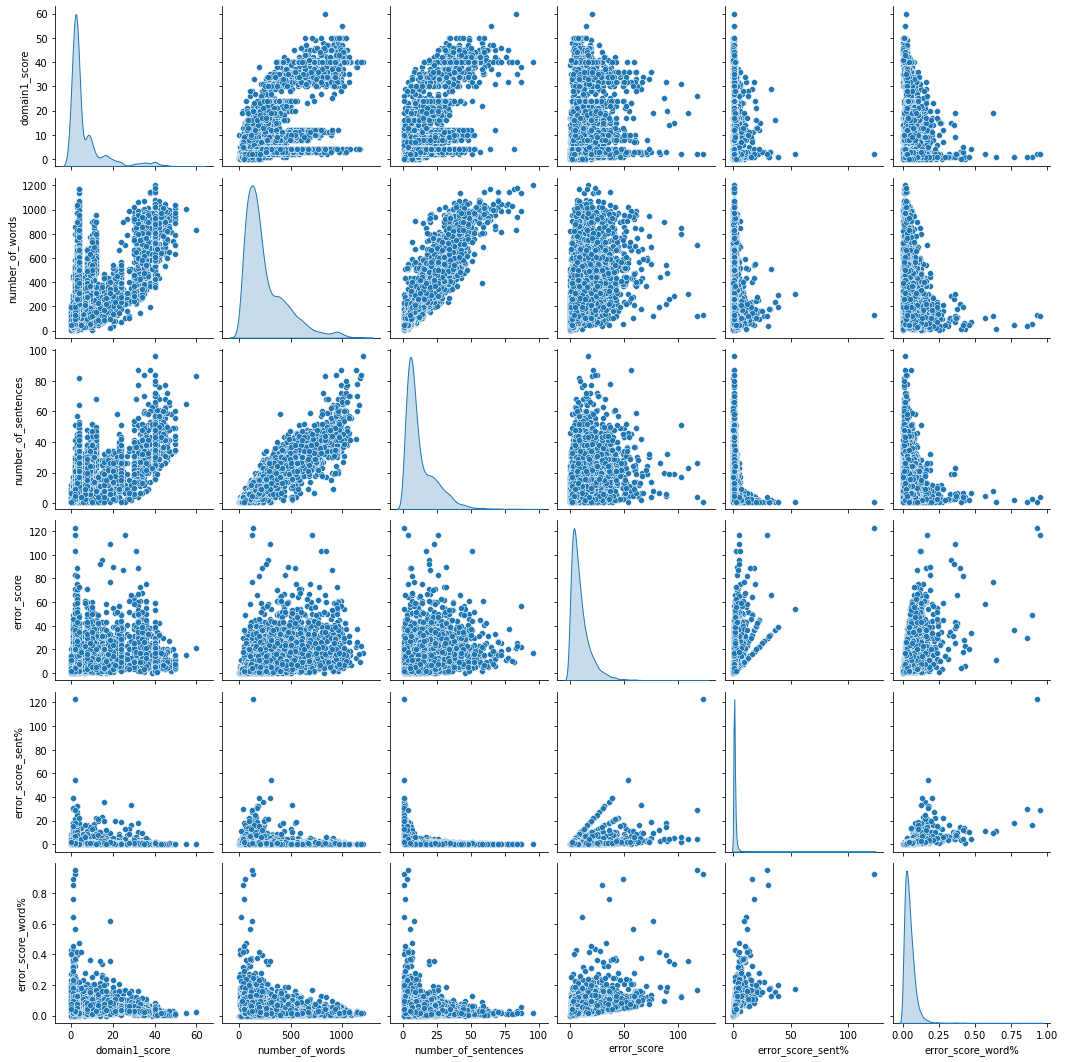

In [78]:
sns.pairplot(train_dataset,diag_kind = "kde")

In [79]:
train_labels = train_dataset.pop('domain1_score')
test_labels = test_dataset.pop('domain1_score')

### Scaling train and test data with maximum_absolute_scaler

In [81]:
def maximum_absolute_scaling(df):
    for column in df.columns:
        df[column] = df[column]  / df[column].abs().max()
    return df

normed_train_data = maximum_absolute_scaling(train_dataset)
normed_test_data = maximum_absolute_scaling(test_dataset)

### Implementing ANN model with 5 layers and 30 epochs for all essays

In [83]:
ann = Sequential([
                         Flatten(input_shape=[len(train_dataset.keys())]),
                         Dense(3000, activation='relu'),
                         Dense(1000, activation='relu'),
#                          Dense(712, activation='relu'),
                         Dense(256, activation='relu'),
#                          Dense(128, activation='relu'),
                         Dense(64, activation='softmax'),
#                          Dense(5, activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_hist1 = ann.fit(train_dataset, train_labels, epochs=30, batch_size=32,validation_data=(test_dataset,test_labels))

Epoch 1/30
325/325 [==============================] - 9s 28ms/step - loss: 3.5444 - accuracy: 0.2140 - val_loss: 2.8332 - val_accuracy: 0.2143
Epoch 2/30
325/325 [==============================] - 9s 29ms/step - loss: 2.7316 - accuracy: 0.2224 - val_loss: 2.6623 - val_accuracy: 0.2143
Epoch 3/30
325/325 [==============================] - 9s 27ms/step - loss: 2.6345 - accuracy: 0.2359 - val_loss: 2.5951 - val_accuracy: 0.2143
Epoch 4/30
325/325 [==============================] - 9s 26ms/step - loss: 2.5666 - accuracy: 0.2478 - val_loss: 2.5182 - val_accuracy: 0.2640
Epoch 5/30
325/325 [==============================] - 8s 25ms/step - loss: 2.4865 - accuracy: 0.2957 - val_loss: 2.4326 - val_accuracy: 0.3110
Epoch 6/30
325/325 [==============================] - 8s 25ms/step - loss: 2.4000 - accuracy: 0.3197 - val_loss: 2.3482 - val_accuracy: 0.3441
Epoch 7/30
325/325 [==============================] - 9s 27ms/step - loss: 2.3235 - accuracy: 0.3311 - val_loss: 2.2824 - val_accuracy: 0.3784

### Evaluating the model

In [84]:
ann.evaluate(test_dataset,test_labels)

82/82 [==============================] - 1s 7ms/step - loss: 1.9941 - accuracy: 0.3969


[1.9940979480743408, 0.3969171345233917]

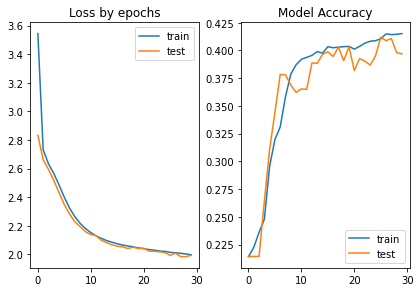

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout()

plt.subplot(121)
plt.title("Loss by epochs")
plt.plot(ann_hist1.history['loss'], label='train')
plt.plot(ann_hist1.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("Model Accuracy")
plt.plot(ann_hist1.history['accuracy'], label='train')
plt.plot(ann_hist1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**Since using the same model created for essay set 2 did not work for all the essay sets. We tried to use other models like CNN to predict the essay score**

## Working on all Essay sets (CNN and LSTM Model)

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stopwordsEng = stopwords.words("english")
# print(stopwordsEng)

import spacy
# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

In [90]:
sets = pd.read_csv('training_set_rel3.tsv', encoding = 'cp437', sep = '\t')
sets.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Printing shape of all individual essay sets and saving maximum domain scores of each essay into seperate set

In [91]:
for i in sets.essay_set.unique():
    
    set_temp = sets[sets['essay_set'] == i]
    locals() ['set_' + str(i)] = set_temp
    
    set_max = set_temp[set_temp['domain1_score'] > set_temp['domain1_score'].quantile(0.75)] 
    set_max["high_score"] = set_max['domain1_score'].apply(lambda x: 1)
    locals() ['max_' + str(i)] = set_max
        
    
    print("Shape of essay set {} is {} and {} essays have max score.".format(i, set_temp.shape, set_max.shape[0] ))
    
    myset = set_temp[set_temp['domain1_score'] <= set_temp['domain1_score'].quantile(0.75)] 
    myset["high_score"] = myset['domain1_score'].apply(lambda x: 0)
    locals() ['myset_' + str(i)] = myset
    
    locals() ['alldata_' + str(i)] = set_max.append(myset)

Shape of essay set 1 is (1783, 28) and 156 essays have max score.
Shape of essay set 2 is (1800, 28) and 82 essays have max score.
Shape of essay set 3 is (1726, 28) and 423 essays have max score.
Shape of essay set 4 is (1770, 28) and 253 essays have max score.
Shape of essay set 5 is (1805, 28) and 258 essays have max score.
Shape of essay set 6 is (1800, 28) and 367 essays have max score.
Shape of essay set 7 is (1569, 28) and 378 essays have max score.
Shape of essay set 8 is (723, 28) and 146 essays have max score.


In [92]:
print(myset_1.shape)
print(max_1.shape)

(1627, 29)
(156, 29)


In [93]:
max_1['domain1_score'].value_counts()

11    109
12     47
Name: domain1_score, dtype: int64

In [94]:
myset_1['domain1_score'].value_counts()

8     687
9     334
10    316
7     135
6     110
5      17
4      17
2      10
3       1
Name: domain1_score, dtype: int64

In [95]:
alldata_1.shape

(1783, 29)

In [96]:
myset_1.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,high_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [97]:
myset_1['domain1_score'].value_counts()

8     687
9     334
10    316
7     135
6     110
5      17
4      17
2      10
3       1
Name: domain1_score, dtype: int64

In [98]:
# Check for missing values in the dataset
sets.isnull().mean()*100

essay_id           0.000000
essay_set          0.000000
essay              0.000000
rater1_domain1     0.000000
rater2_domain1     0.000000
rater3_domain1    99.013564
domain1_score      0.000000
rater1_domain2    86.128237
rater2_domain2    86.128237
domain2_score     86.128237
rater1_trait1     82.336621
rater1_trait2     82.336621
rater1_trait3     82.336621
rater1_trait4     82.336621
rater1_trait5     94.428175
rater1_trait6     94.428175
rater2_trait1     82.336621
rater2_trait2     82.336621
rater2_trait3     82.336621
rater2_trait4     82.336621
rater2_trait5     94.428175
rater2_trait6     94.428175
rater3_trait1     99.013564
rater3_trait2     99.013564
rater3_trait3     99.013564
rater3_trait4     99.013564
rater3_trait5     99.013564
rater3_trait6     99.013564
dtype: float64

### Concatenating processed data of all individual essay sets into single DataFrame

In [99]:
alldata = pd.concat([alldata_1,alldata_2,alldata_3,alldata_4,alldata_5,alldata_6,alldata_7,alldata_8], axis = 0)

In [100]:
# Drop all the columns with more than 80% missing values
df = alldata[['essay_id','essay_set','essay','domain1_score','domain2_score','high_score']]
df.head(2)

,essay_id,essay_set,essay,domain1_score,domain2_score,high_score
15,16,1,"Dear @ORGANIZATION1, The computer blinked to l...",12,NaN,1
23,24,1,"Dear local newspaper, I've heard that not many...",11,NaN,1


## Create new features based on Essay and Visualize

In [101]:
# Get number of words
df["num_words"] = df['essay'].apply(lambda x: len(word_tokenize(x)))

In [102]:
# Get number of sentences
df["num_sent"] = df['essay'].apply(lambda x: len(sent_tokenize(x)))

In [103]:
# Get number of stopwords in each essay
df["num_stopwords"] = df['essay'].apply(lambda x: len([i for i in word_tokenize(x) if i in  stopwordsEng]))

In [104]:
df.head(2)

,essay_id,essay_set,essay,domain1_score,domain2_score,high_score,num_words,num_sent,num_stopwords
15,16,1,"Dear @ORGANIZATION1, The computer blinked to l...",12,NaN,1,605,35,209
23,24,1,"Dear local newspaper, I've heard that not many...",11,NaN,1,673,39,233


In [105]:
df = df.sort_index()
df.head(2)

,essay_id,essay_set,essay,domain1_score,domain2_score,high_score,num_words,num_sent,num_stopwords
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN,0,386,16,165
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,0,464,20,181


## Exploring the data through Visualization

### Distribution of Scores in each Essay Set

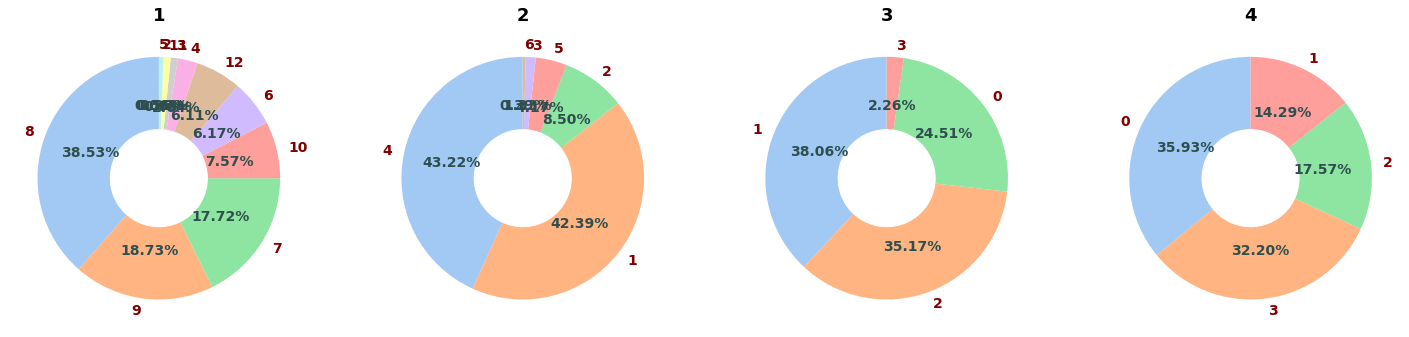

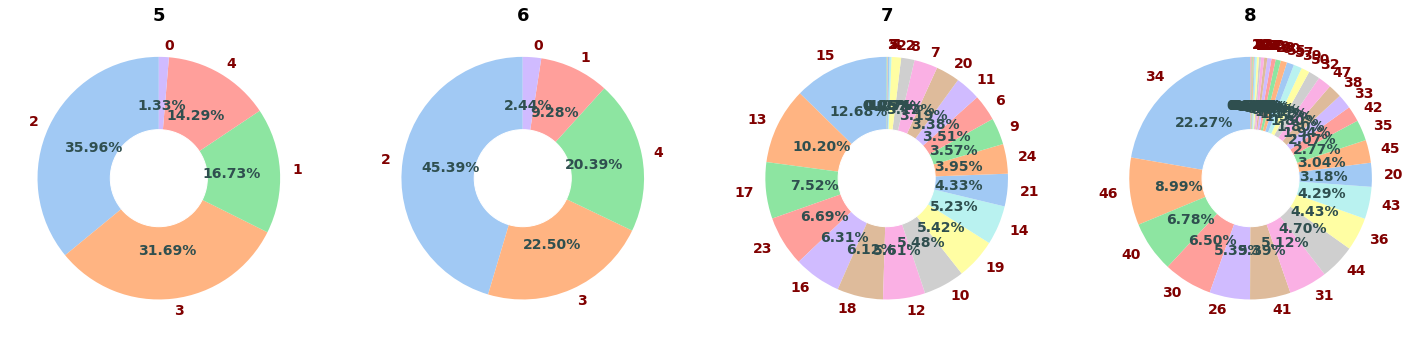

In [106]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,8)

colors = sns.color_palette('pastel')

for i in range(1,len(sets.essay_set.unique()+1),4):
    
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
    
    wedges1,texts1,autopcts1 = ax1.pie(sets[sets['essay_set'] == i].domain1_score.value_counts(),
                                         startangle=90, autopct='%1.2f%%', 
                                         labels = sets[sets['essay_set'] == i].domain1_score.unique(), colors = colors)
    ax1.set_title(i, weight = 'bold', fontsize = 18)
    plt.setp(autopcts1, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts1, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    plt.axes(ax1)
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    
    wedges2,texts2,autopcts2 = ax2.pie(sets[sets['essay_set'] == i + 1].domain1_score.value_counts(),
                                       startangle=90, autopct='%1.2f%%', 
                                         labels = sets[sets['essay_set'] == i + 1].domain1_score.unique(), colors = colors)
    ax2.set_title(i + 1, weight = 'bold', fontsize = 18)
    plt.setp(autopcts2, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts2, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    plt.axes(ax2)
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    wedges3,texts3,autopcts3 = ax3.pie(sets[sets['essay_set'] == i + 2].domain1_score.value_counts(),    
                                         startangle=90, autopct='%1.2f%%', 
                                         labels = sets[sets['essay_set'] == i + 2].domain1_score.unique(), colors = colors)
    ax3.set_title(i + 2, weight = 'bold', fontsize = 18)
    plt.setp(autopcts3, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts3, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    plt.axes(ax3)
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    wedges4,texts4,autopcts4 = ax4.pie(sets[sets['essay_set'] == i + 3].domain1_score.value_counts(),
                                         startangle=90, autopct='%1.2f%%', 
                                         labels = sets[sets['essay_set'] == i + 3].domain1_score.unique(), colors = colors)
    ax4.set_title(i + 3, weight = 'bold', fontsize = 18)
    plt.setp(autopcts4, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts4, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    plt.axes(ax4)
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
      
    
    plt.show()

### Distribution of scores by number of words in essay set 1

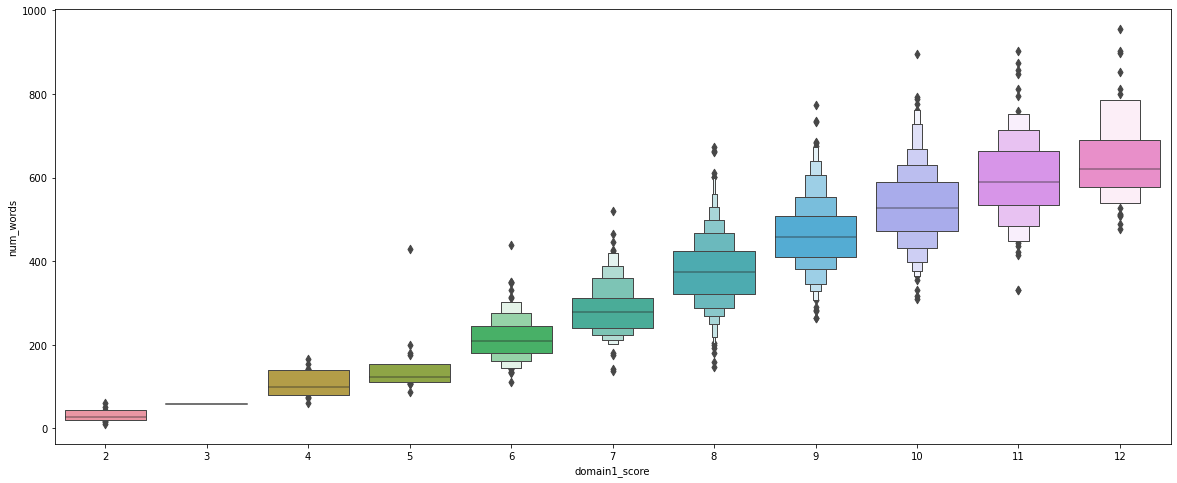

In [107]:
plt.rcParams['figure.figsize'] = 20,8
# Find the distribution of domain score within each essay set (separate essays with different range)
ax = sns.boxenplot(x="domain1_score", y="num_words", data=df[df["essay_set"].isin([1])])


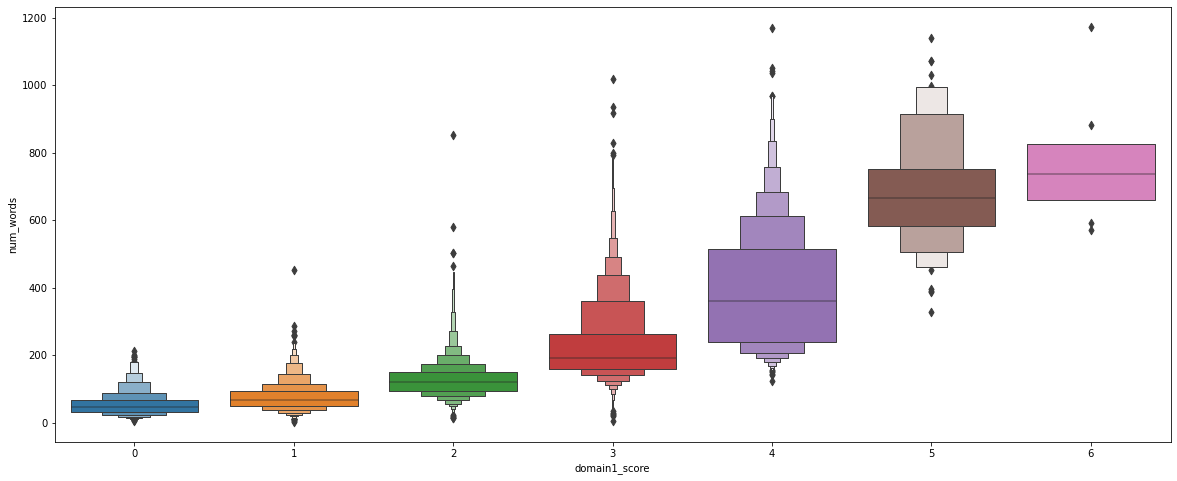

In [108]:
# Find the distribution of domain score within each essay set (separate essays with different range)
ax = sns.boxenplot(x="domain1_score", y="num_words", data=df[df["essay_set"].isin([2,3,4,5,6])])

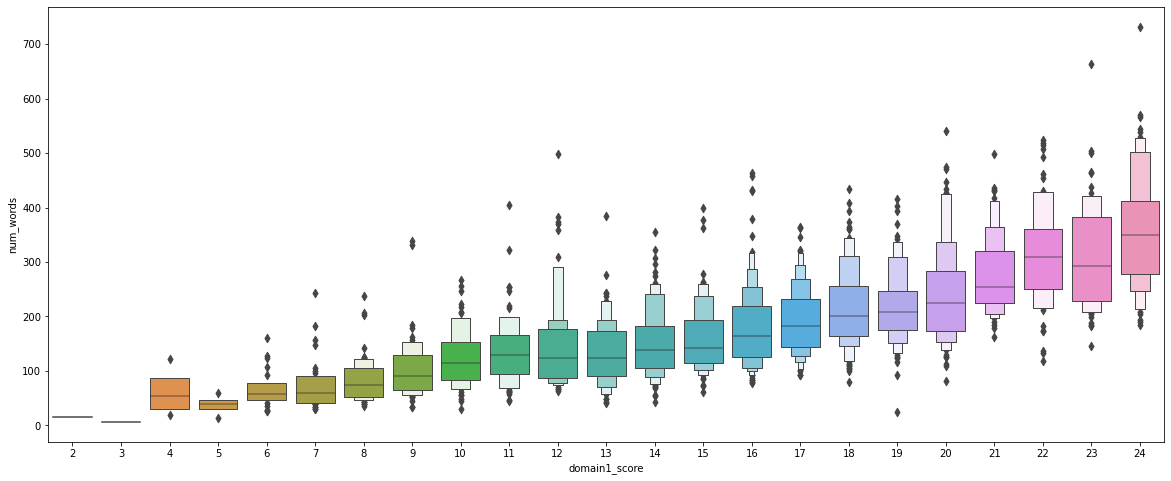

In [109]:
# Find the distribution of domain score within each essay set (separate essays with different range)
ax = sns.boxenplot(x="domain1_score", y="num_words", data=df[df["essay_set"].isin([7])])

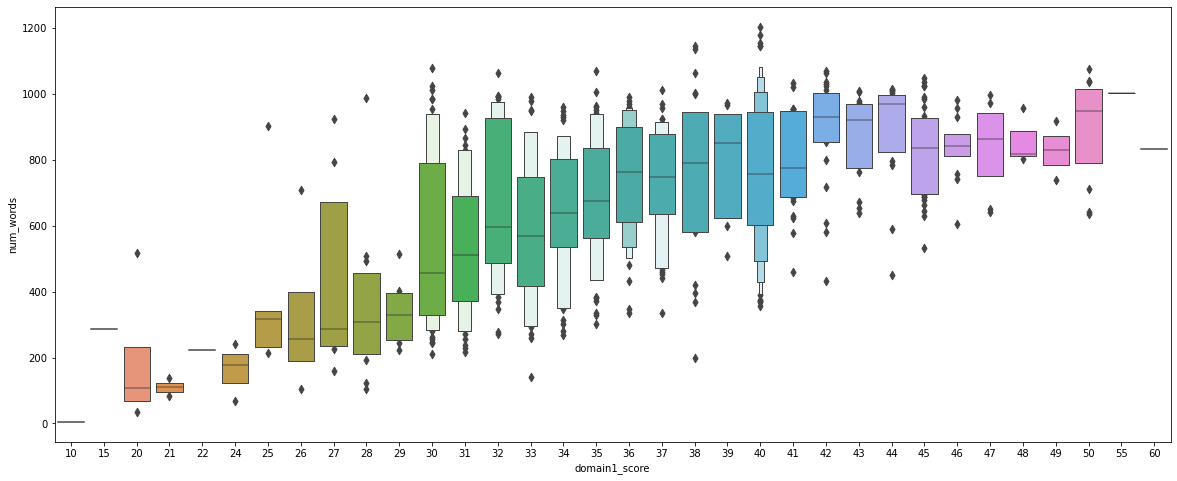

In [110]:
# Find the distribution of domain score within each essay set (separate essays with different range)
ax = sns.boxenplot(x="domain1_score", y="num_words", data=df[df["essay_set"].isin([8])])

## Show the relation between number of words, sentences and stopwords with high score

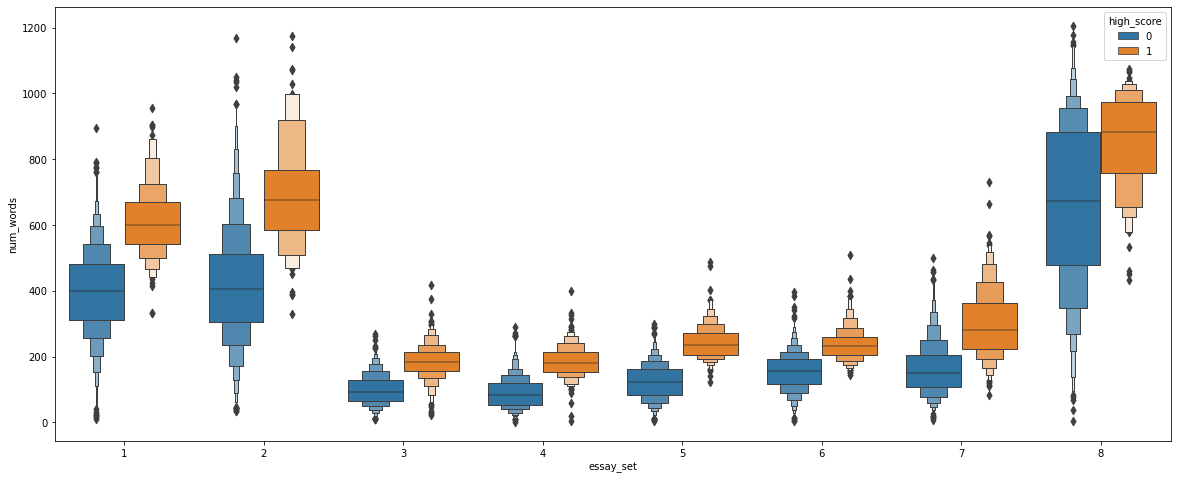

In [111]:
ax = sns.boxenplot(x="essay_set", y="num_words", data=df, hue = "high_score")

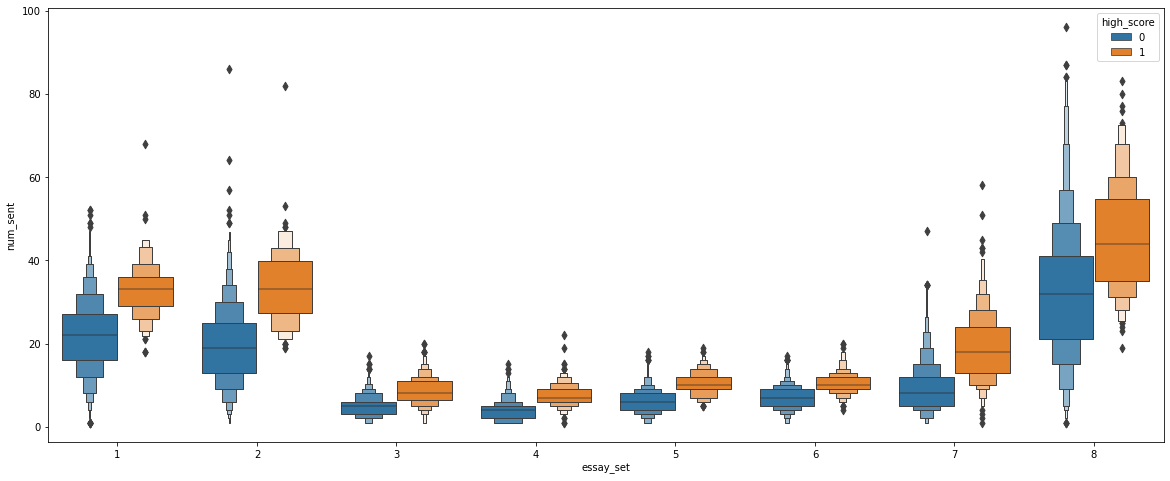

In [112]:
ax = sns.boxenplot(x="essay_set", y="num_sent", data=df, hue = "high_score")

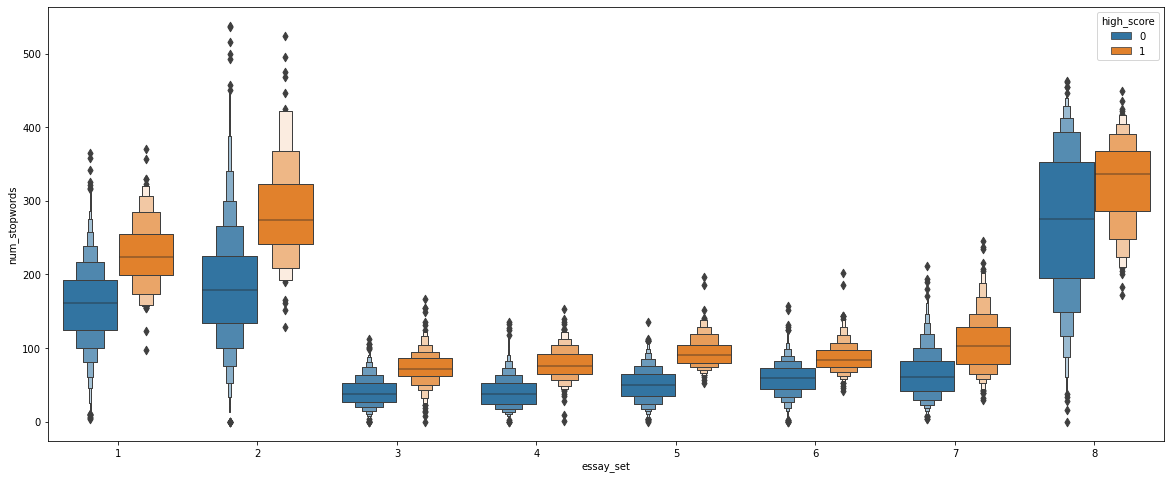

In [113]:
ax = sns.boxenplot(x="essay_set", y="num_stopwords", data=df, hue = "high_score")

In [114]:
alldata_8["high_score"].value_counts()

0    577
1    146
Name: high_score, dtype: int64

In [115]:
max(df[df['high_score'] == 0]['num_words'])

1204

## Clean the data

In [116]:
datacopy = alldata.copy()
# alldata = datacopy.copy()

In [117]:
alldata.columns.values

array(['essay_id', 'essay_set', 'essay', 'rater1_domain1',
       'rater2_domain1', 'rater3_domain1', 'domain1_score',
       'rater1_domain2', 'rater2_domain2', 'domain2_score',
       'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4',
       'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2',
       'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
       'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4',
       'rater3_trait5', 'rater3_trait6', 'high_score'], dtype=object)

In [118]:
alldata = alldata[['essay_id','essay_set','essay','domain1_score','domain2_score','high_score']]

In [119]:
def clean_essay(df, input_column, output_column):
    df[output_column] = df[input_column].apply(lambda x: word_tokenize(x.lower()))
#     df[output_column] = df[output_column].apply(lambda x: [i for i in x if i not in stopwordsEng])
    df[output_column] = df[output_column].apply(lambda x: [i for i in x if i not in STOP_WORDS])
    df[output_column] = df[output_column].apply(lambda x: [i for i in x if i not in list(string.punctuation)])
    df[output_column] = df[output_column].apply(lambda x: [re.sub('\W+','',i) for i in x ])
    df[output_column] = df[output_column].apply(lambda x: [re.sub(r'[0-9]','',i) for i in x ])
    df[output_column] = df[output_column].apply(lambda x: list(filter(None,x)))
    df[output_column] = df[output_column].apply(lambda x: [WordNetLemmatizer().lemmatize(i) for i in x])
    df[output_column] = df[output_column].apply(lambda x: ' '.join(x))
    
    return df

In [120]:
alldata = clean_essay(alldata, 'essay', 'essay_processed')

In [121]:
alldata.shape

(12976, 7)

In [122]:
alldata.head(2)

,essay_id,essay_set,essay,domain1_score,domain2_score,high_score,essay_processed
15,16,1,"Dear @ORGANIZATION1, The computer blinked to l...",12,NaN,1,dear organization computer blinked life image ...
23,24,1,"Dear local newspaper, I've heard that not many...",11,NaN,1,dear local newspaper heard people think comput...


### Use the cleaned essay sets to process for the model

#### Required Libraries for Deep Learning Model

In [123]:

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer

# For one-hot encoding
from tensorflow.keras.utils import to_categorical

# For DL model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# For generating random integers
from random import randint

# For TF-IDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

# For K-Fold cross validation
from sklearn.model_selection import KFold

# For padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

# For Splitting the Data
from sklearn.model_selection import train_test_split

In [124]:
alldata.essay_set.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

**First we convert the data into sequences using Keras tokenizer and convert the character data into numerical sequences. We have assigned the maximum length of 450 for each sequence after checking the length of all sequences after pre-processing. To keep the length uniform for the model , we pad 0 to sequences that are of length 450. This action is done separately for all essay sets**


In [168]:
dataset = []
for i in range(0,8):
    dataset.append(alldata[alldata.essay_set==i+1].rename(columns={"essay_processed":"corpus",
                                                                   "domain1_score":"score"}).loc[:,["corpus","score"]])
MAX_LEN = 450
tokenizer = []
sequences = []
labels = []
vocabLength = 0
for setno in range(0,8):
    myTokenizer = Tokenizer()
    myTokenizer.fit_on_texts(dataset[setno].corpus) 
    sequence=myTokenizer.texts_to_sequences(dataset[setno].corpus)
    word_index = myTokenizer.word_index 
    print("Sequence Length:",max([len(i) for i in sequence]))
    sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    tokenizer.append(myTokenizer)
    sequences.append(sequence)
    labels.append(np.asarray(dataset[setno].score))
    print("Sequence Length:",max([len(i) for i in sequence]))
    print("Unique words in essay set {} : {}".format(setno,len(word_index)))
    print(" ")
    vocabLength = vocabLength + len(word_index)
    
print(vocabLength)   

Sequence Length: 367
Sequence Length: 450
Unique words in essay set 0 : 14563
 
Sequence Length: 453
Sequence Length: 450
Unique words in essay set 1 : 13282
 
Sequence Length: 179
Sequence Length: 450
Unique words in essay set 2 : 6460
 
Sequence Length: 154
Sequence Length: 450
Unique words in essay set 3 : 4852
 
Sequence Length: 202
Sequence Length: 450
Unique words in essay set 4 : 4617
 
Sequence Length: 208
Sequence Length: 450
Unique words in essay set 5 : 5017
 
Sequence Length: 308
Sequence Length: 450
Unique words in essay set 6 : 10243
 
Sequence Length: 454
Sequence Length: 450
Unique words in essay set 7 : 10937
 
69971


**After checking the maximum number of words in the vocabulary of each essay set, we setup the embedding layer to reduce the vocabulary to 100 dimensions, before loading the data to all the models. We have used several parameter inputs for each of the layers to ensure better model performance based on our learning.**

 Now Compiling..... Essay Set 0
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_21 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_91 (Dense)            (None, None, 32)          4128      
                                                                 
 dense_92 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
42/42 [==============================] - 5s 104ms/step - loss: 62.9589 - mae: 7.7909 - val_loss: 57.5020 - val_mae: 7.4027
Epoc

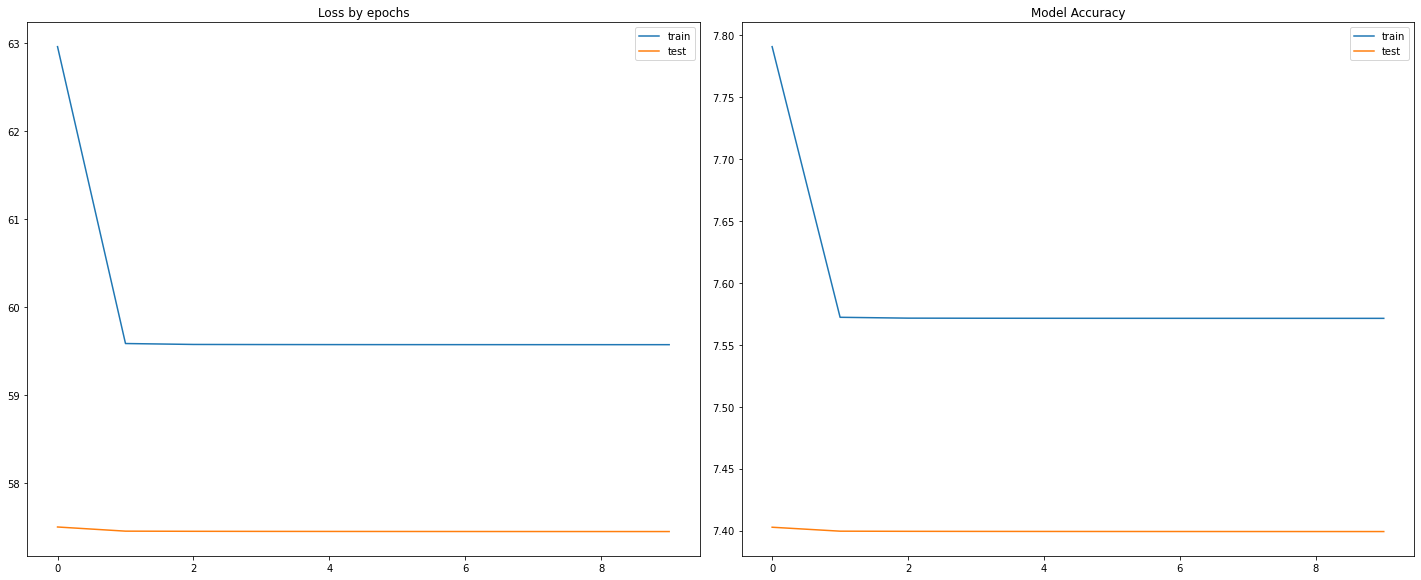

 Now Compiling..... Essay Set 1
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_22 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_93 (Dense)            (None, None, 32)          4128      
                                                                 
 dense_94 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
43/43 [==============================] - 5s 103ms/step - loss: 7.2987 - mae: 2.5819 - val_loss: 6.5853 - val_mae: 2.4460
Epoch 

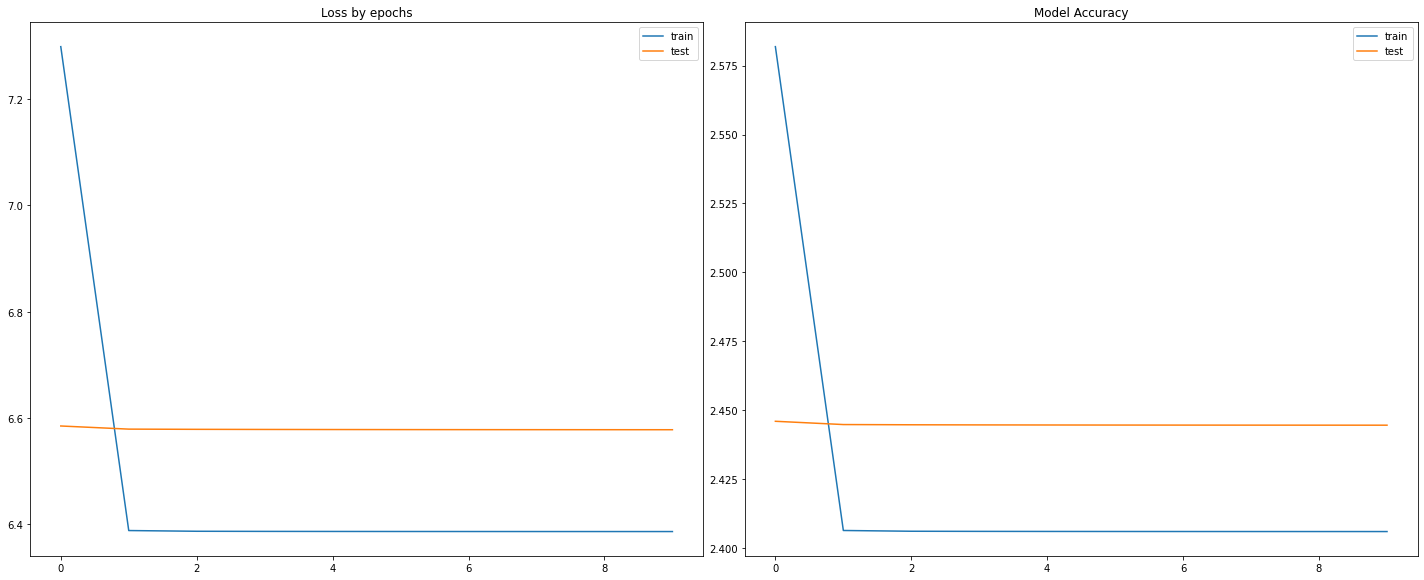

 Now Compiling..... Essay Set 2
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_23 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_95 (Dense)            (None, None, 32)          4128      
                                                                 
 dense_96 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
41/41 [==============================] - 5s 97ms/step - loss: 1.7952 - mae: 1.0748 - val_loss: 1.3968 - val_mae: 0.9081
Epoch 2

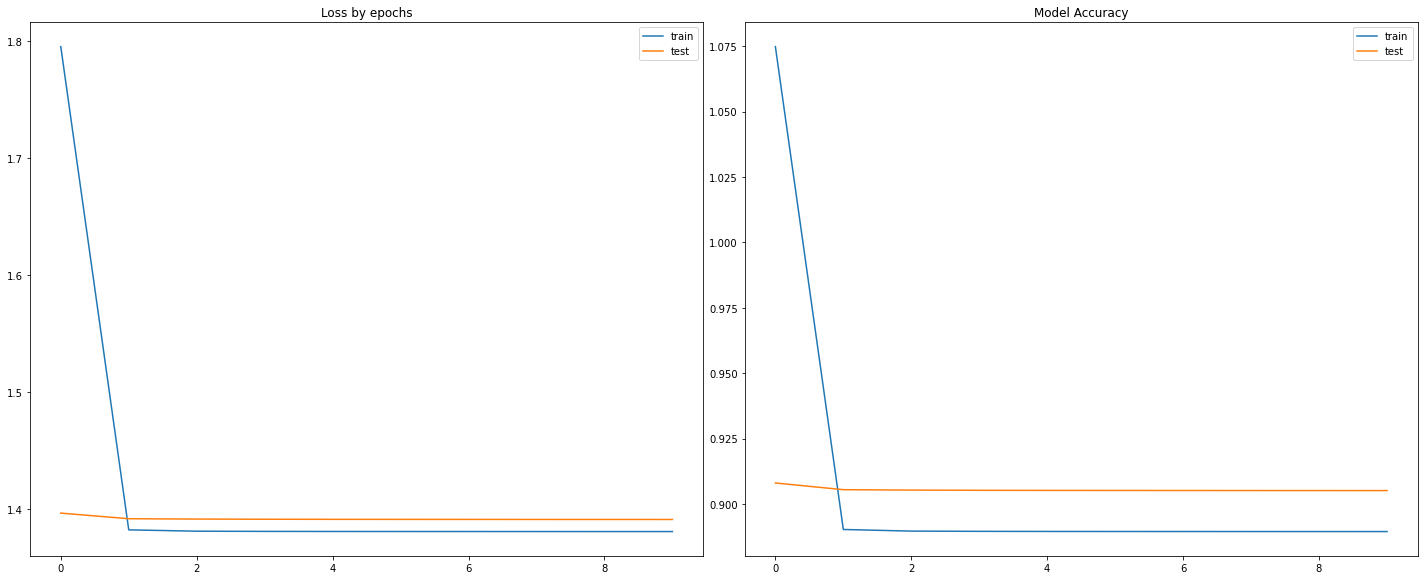

 Now Compiling..... Essay Set 3
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_24 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_97 (Dense)            (None, None, 32)          4128      
                                                                 
 dense_98 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
42/42 [==============================] - 5s 96ms/step - loss: 1.2871 - mae: 0.9038 - val_loss: 1.0874 - val_mae: 0.8025
Epoch 2

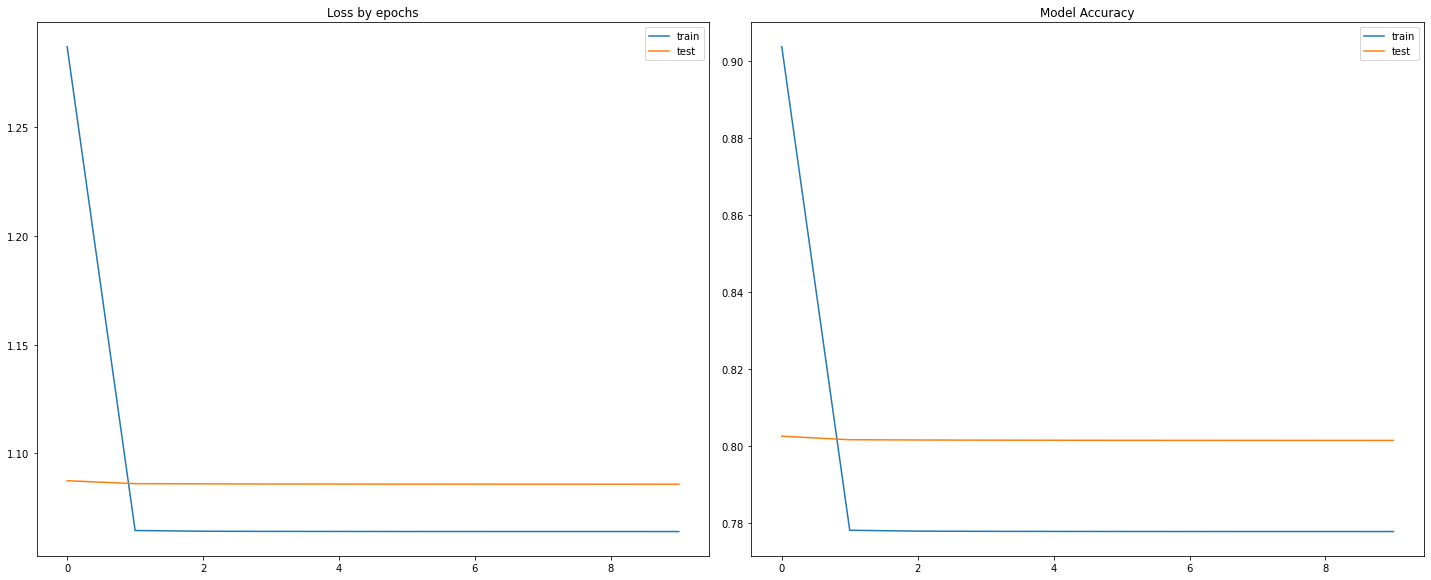

 Now Compiling..... Essay Set 4
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_25 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_99 (Dense)            (None, None, 32)          4128      
                                                                 
 dense_100 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
43/43 [==============================] - 6s 115ms/step - loss: 3.5928 - mae: 1.6442 - val_loss: 3.0250 - val_mae: 1.4405
Epoch 

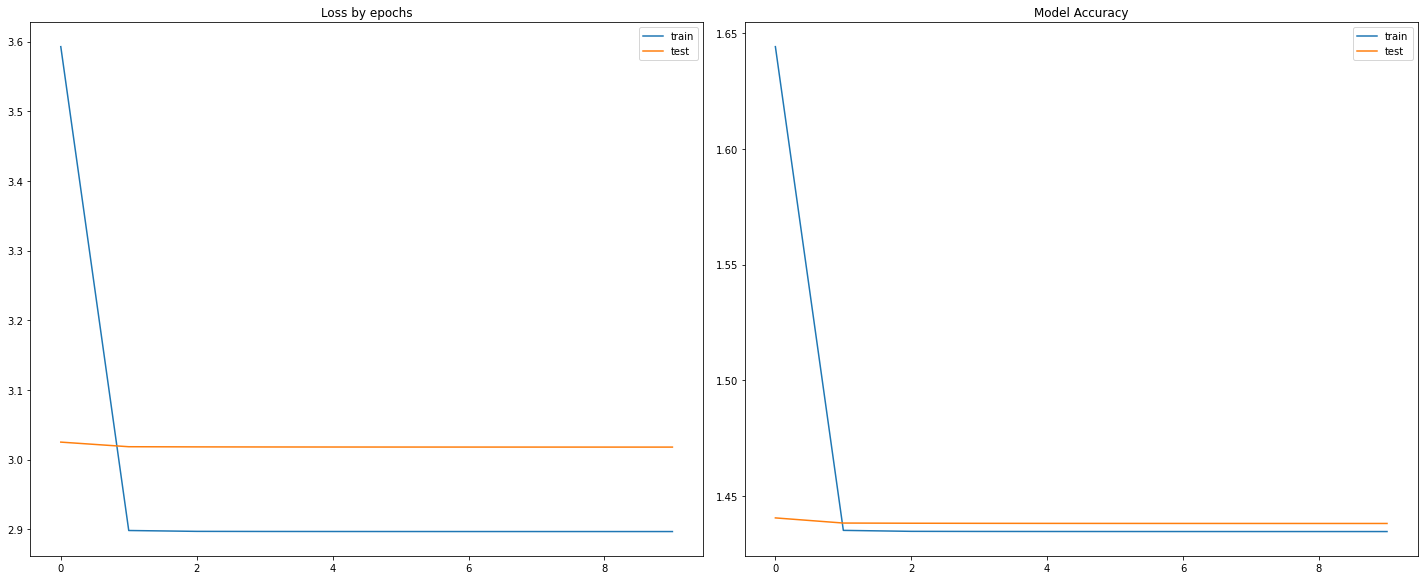

 Now Compiling..... Essay Set 5
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_26 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_101 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_102 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
43/43 [==============================] - 5s 94ms/step - loss: 4.4233 - mae: 1.9053 - val_loss: 4.0601 - val_mae: 1.8051
Epoch 2

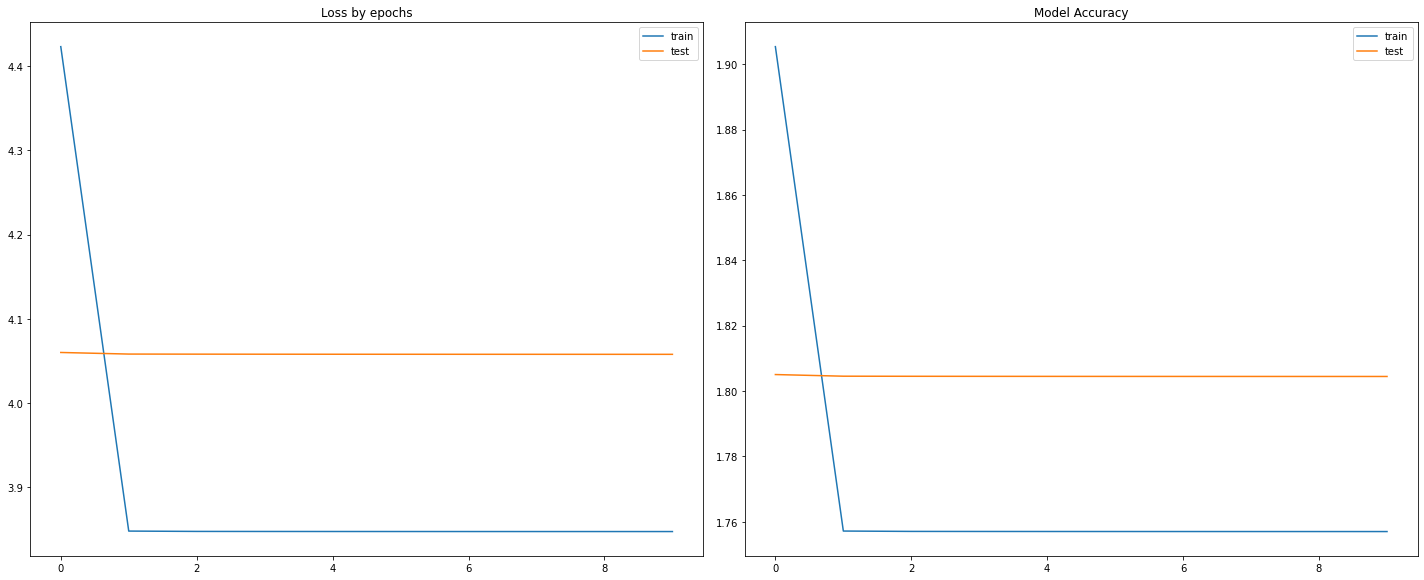

 Now Compiling..... Essay Set 6
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_27 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_103 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_104 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
37/37 [==============================] - 4s 96ms/step - loss: 254.7726 - mae: 15.2910 - val_loss: 250.0077 - val_mae: 15.1195
E

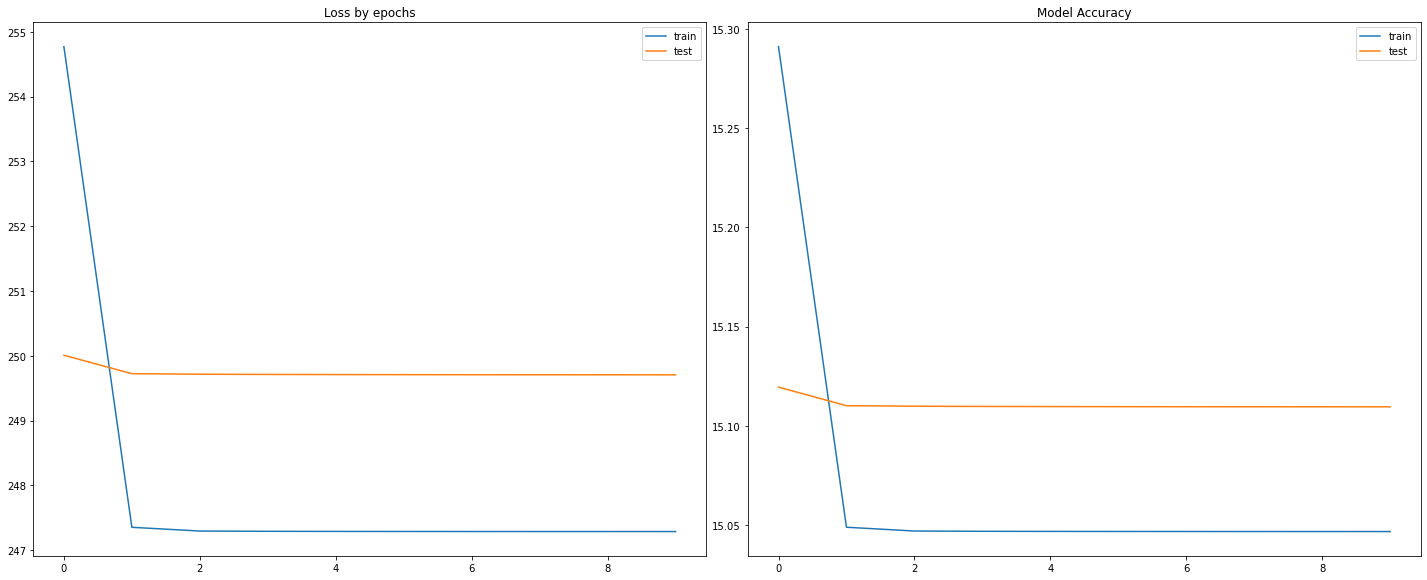

 Now Compiling..... Essay Set 7
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_35 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_28 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_105 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_106 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
17/17 [==============================] - 2s 104ms/step - loss: 1352.2305 - mae: 36.3304 - val_loss: 1354.2891 - val_mae: 36.319

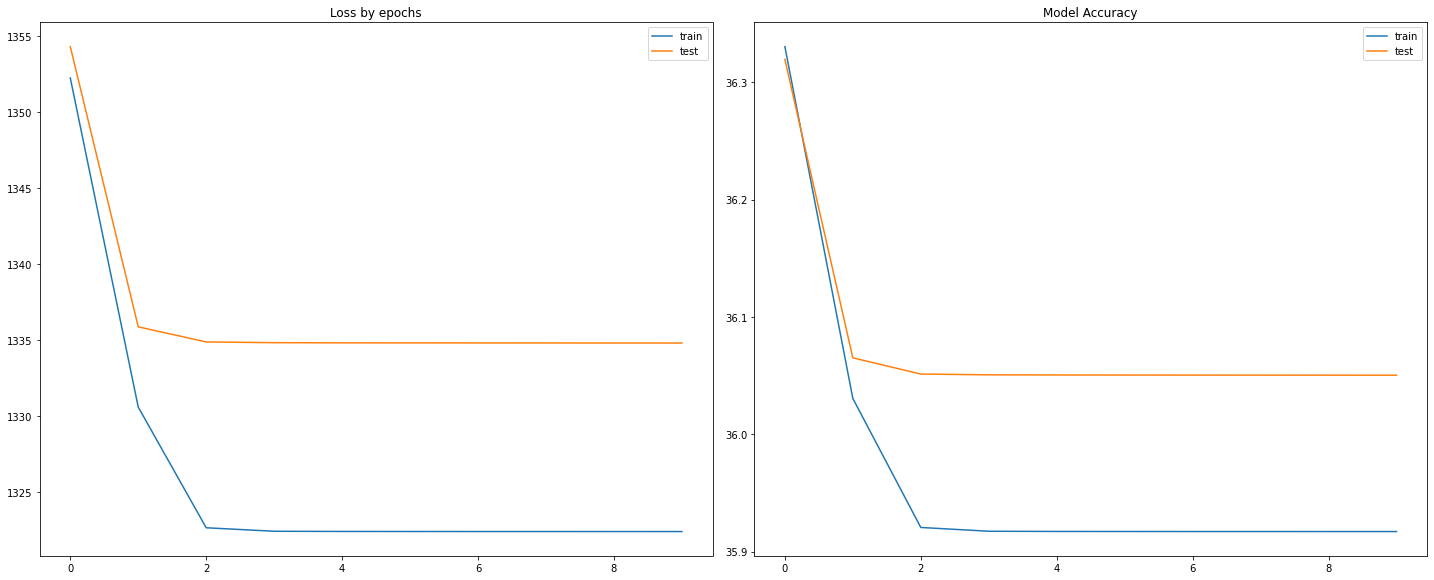

In [169]:
cnnmodel=[]
history=[]
MAX_NUM_WORDS=15000 
EMBEDDING_DIM=100
for setno in range(0,8):
    cnn = Sequential()
    cnn.add(Embedding(MAX_NUM_WORDS,EMBEDDING_DIM))
    cnn.add(Conv1D(128, 3, input_shape = [len(sequence),450], activation='relu'))
    cnn.add(Dense(32, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    cnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    print(" Now Compiling..... Essay Set {}".format(setno))
    print(cnn.summary())
    
    x_train, x_val, y_train, y_val = train_test_split(sequences[setno], labels[setno])
    cnn_hist=cnn.fit(x_train, y_train, batch_size=32,  epochs=10, validation_data=(x_val, y_val))
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    fig.tight_layout()

    plt.subplot(121)
    plt.title("Loss by epochs")
    plt.plot(cnn_hist.history['loss'], label='train')
    plt.plot(cnn_hist.history['val_loss'], label='test')
    plt.legend()
    plt.subplot(122)
    plt.title("Model Accuracy")
    plt.plot(cnn_hist.history['mae'], label='train')
    plt.plot(cnn_hist.history['val_mae'], label='test')
    plt.legend()
    plt.show()
    
    path = "./models/CNN/aes_set_"+str(setno+1)+".h5" 
    cnn.save(path)
    
    cnnmodel.append(cnn)

**We read the test data here and process it using the function we defined for cleaning the data. After this step, the essay_processed would not have any stopwords, punctuations or numbers and by doing this we have reduces the number of dimesions significantly**

In [166]:
test_data = clean_essay(test, 'essay', 'essay_processed')

**We use the same set of codes to convert the test data into numerical sequences, as we did for training data. We have also considered id's present in the test data, just for the ease of validating the scores once we have them**

In [171]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450

for i in range(0,8):
    dataset.append(test_data[test_data.essay_set==i+1].rename(columns={"domain1_predictionid":"id",
                                                                      "essay_processed":"corpus"}).loc[:,["id","corpus"]])

sequences=[]
answers=[]
for setno in range(0,8):
    sequence=tokenizer[setno].texts_to_sequences(dataset[setno].corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=cnnmodel[setno].predict(sequence)
    answers.append(answer)
    dataset[setno]['score'] = answer.tolist()
    dataset[setno]['score'] = dataset[setno]['score'].apply(lambda x: np.round(x[0],0).item())

In [173]:
# Push all the predictions into a dataframe for easy handling
predicted = pd.concat(dataset)
predicted.shape

(4254, 3)

In [174]:
# Check the scores of sample records
predicted.sample(10)

,id,corpus,score
1932,14410,ôwhen come saeng vowed silently spring snow me...,1.0
537,2921,believe computer positive effect people survey...,1.0
890,8370,offensive material library book child age adul...,1.0
1393,11489,cyclist lucky threw tuff exiting journy dehydr...,1.0
1957,14436,author includes passage story represents sort ...,1.0
174,2557,dear local newspaper cap like talk adult child...,1.0
4058,25010,year ago dad got job big city away little town...,1.0
178,2561,dear newspaper cap felt fresh lazy fun outside...,1.0
3625,23231,patient patient understanding tolerant iæve pa...,1.0
3443,20729,obstacle builder faced trying allow dirigible ...,1.0


In [175]:
predicted.score.unique()

array([1.])

**From the above results, we found that CNN model with the given parameters is not performing very well and it shows 1 as scores for all the essay sets. To overcome this issue, we tried using relu as the last layer's output, so that the activation function shows the output in the form of max(0,value) instead of forcing the outcome to be 1 if its greater than 0**

### Improving the accuracy by using relu function as the output

**We continue the same set of steps for preprocessing, model building, processing test data, predicting essay score for all the models, except few changes in the parameters of model configuration**
- ***In the below case we have used RELU as the Output activation function to improve the predictive capability of the model***

In [176]:
dataset = []
for i in range(0,8):
    dataset.append(alldata[alldata.essay_set==i+1].rename(columns={"essay_processed":"corpus",
                                                                   "domain1_score":"score"}).loc[:,["corpus","score"]])
MAX_LEN = 450
tokenizer = []
sequences = []
labels = []
vocabLength = 0
for setno in range(0,8):
    myTokenizer = Tokenizer()
    myTokenizer.fit_on_texts(dataset[setno].corpus) 
    sequence=myTokenizer.texts_to_sequences(dataset[setno].corpus)
    word_index = myTokenizer.word_index 
    print("Sequence Length:",max([len(i) for i in sequence]))
    sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    tokenizer.append(myTokenizer)
    sequences.append(sequence)
    labels.append(np.asarray(dataset[setno].score))
    print("Sequence Length:",max([len(i) for i in sequence]))
    print("Unique words in essay set {} : {}".format(setno,len(word_index)))
    print(" ")
    vocabLength = vocabLength + len(word_index)
    
print(vocabLength)   

Sequence Length: 367
Sequence Length: 450
Unique words in essay set 0 : 14563
 
Sequence Length: 453
Sequence Length: 450
Unique words in essay set 1 : 13282
 
Sequence Length: 179
Sequence Length: 450
Unique words in essay set 2 : 6460
 
Sequence Length: 154
Sequence Length: 450
Unique words in essay set 3 : 4852
 
Sequence Length: 202
Sequence Length: 450
Unique words in essay set 4 : 4617
 
Sequence Length: 208
Sequence Length: 450
Unique words in essay set 5 : 5017
 
Sequence Length: 308
Sequence Length: 450
Unique words in essay set 6 : 10243
 
Sequence Length: 454
Sequence Length: 450
Unique words in essay set 7 : 10937
 
69971


 Now Compiling..... Essay Set 0
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_29 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_107 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_108 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
42/42 [==============================] - 5s 107ms/step - loss: 45.8661 - mae: 6.1455 - val_loss: 9.6422 - val_mae: 2.6820
Epoch

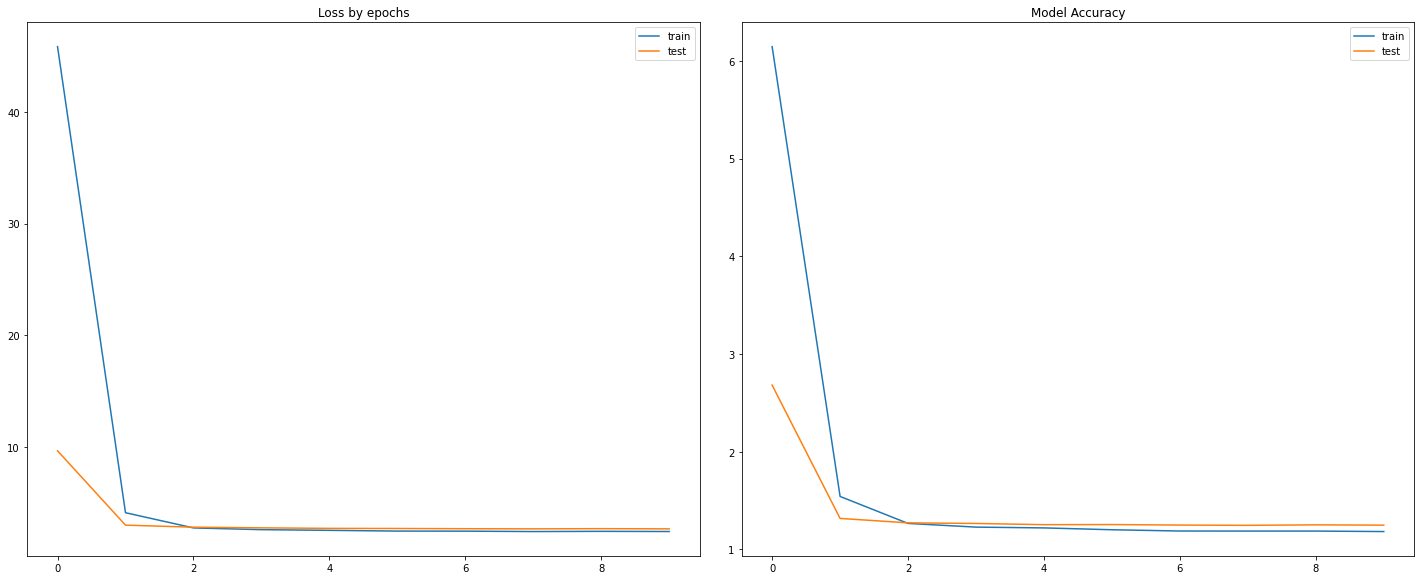

 Now Compiling..... Essay Set 1
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_30 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_109 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_110 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
43/43 [==============================] - 5s 96ms/step - loss: 5.1950 - mae: 1.9083 - val_loss: 0.8910 - val_mae: 0.7364
Epoch 2

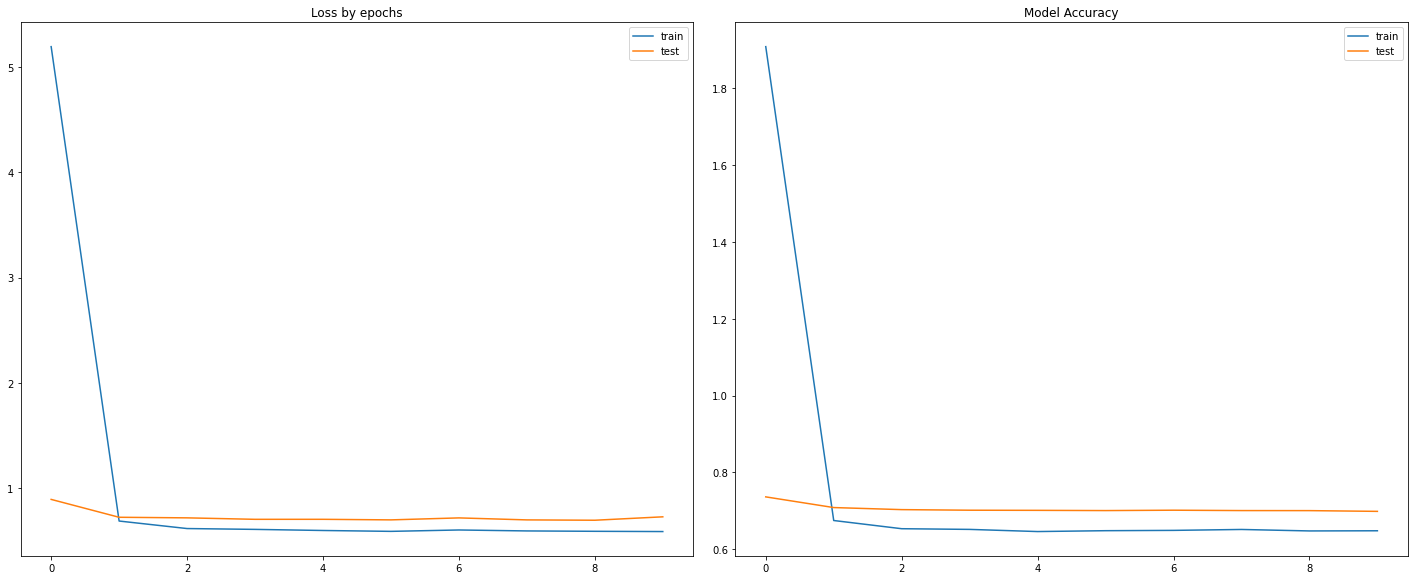

 Now Compiling..... Essay Set 2
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_31 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_111 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_112 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
41/41 [==============================] - 4s 95ms/step - loss: 1.7365 - mae: 1.0764 - val_loss: 0.7918 - val_mae: 0.7668
Epoch 2

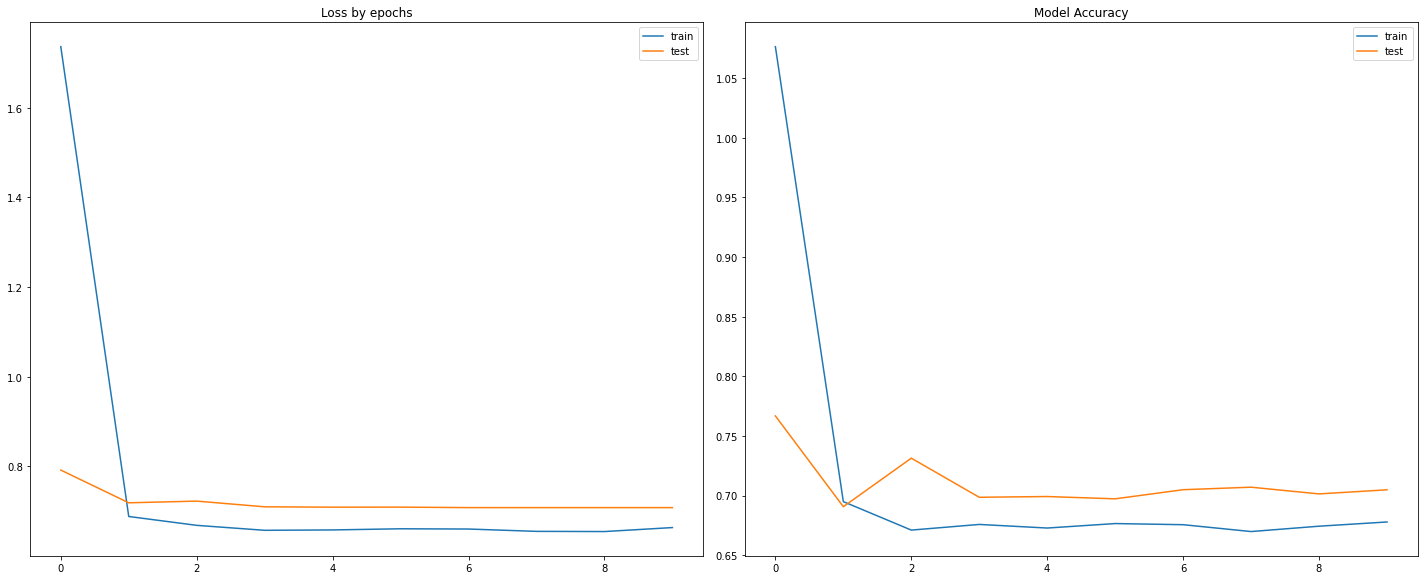

 Now Compiling..... Essay Set 3
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_32 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_113 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_114 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
42/42 [==============================] - 5s 93ms/step - loss: 1.3943 - mae: 0.9655 - val_loss: 0.8995 - val_mae: 0.8076
Epoch 2

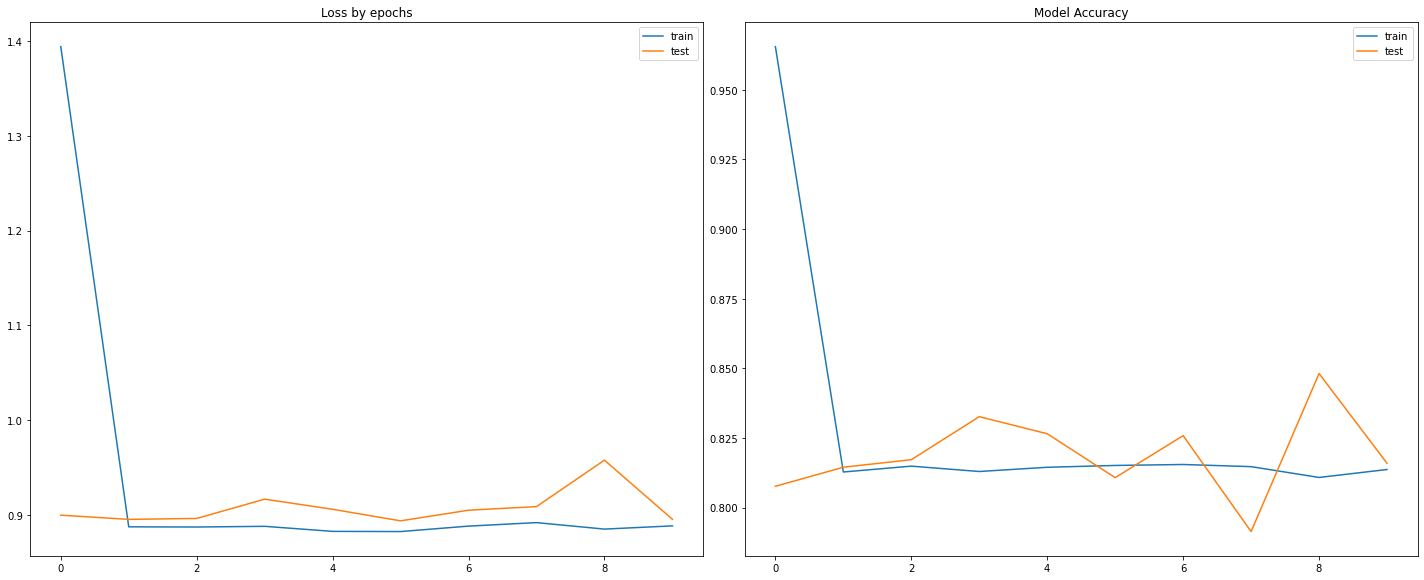

 Now Compiling..... Essay Set 4
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_33 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_115 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_116 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
43/43 [==============================] - 5s 99ms/step - loss: 2.3840 - mae: 1.2264 - val_loss: 0.9457 - val_mae: 0.7979
Epoch 2

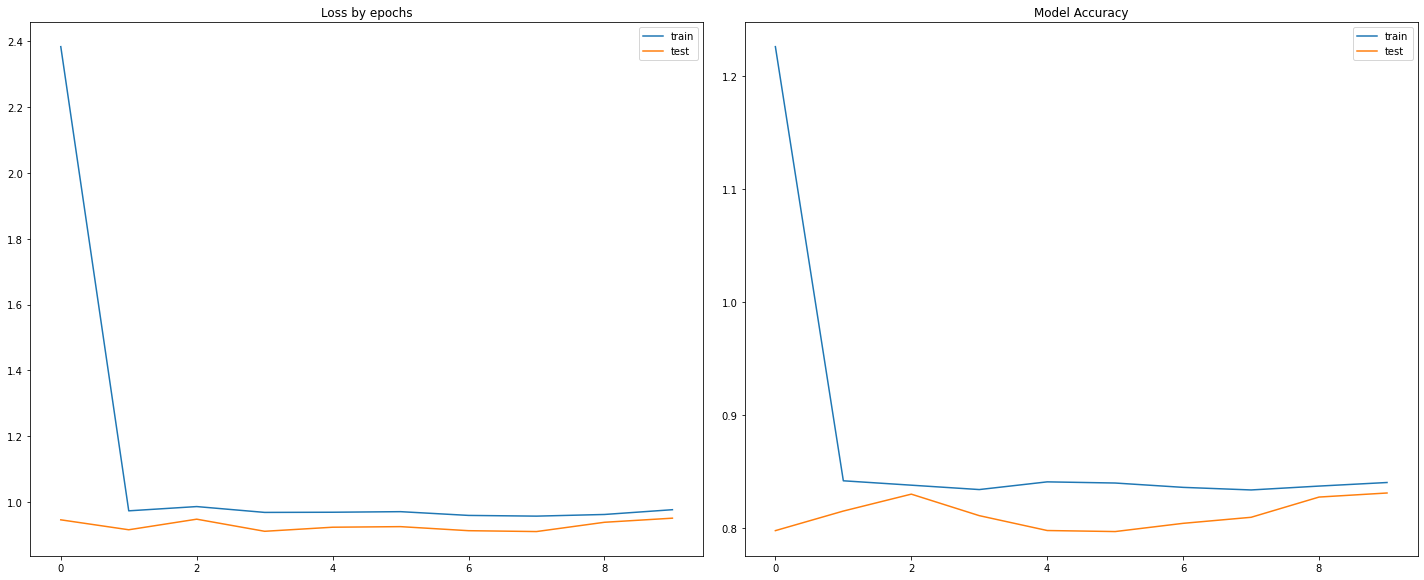

 Now Compiling..... Essay Set 5
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_34 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_117 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_118 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
43/43 [==============================] - 5s 93ms/step - loss: 3.7661 - mae: 1.6139 - val_loss: 1.1325 - val_mae: 0.9071
Epoch 2

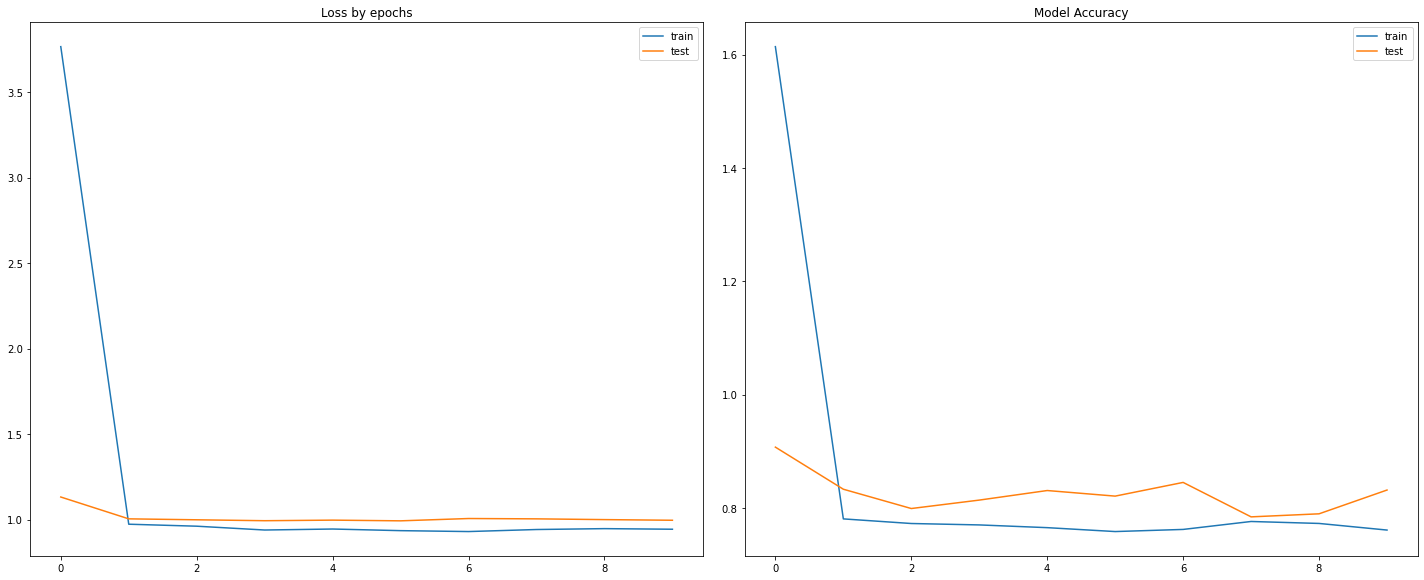

 Now Compiling..... Essay Set 6
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_35 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_119 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_120 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
37/37 [==============================] - 4s 97ms/step - loss: 245.6685 - mae: 14.9134 - val_loss: 113.5607 - val_mae: 9.5484
Ep

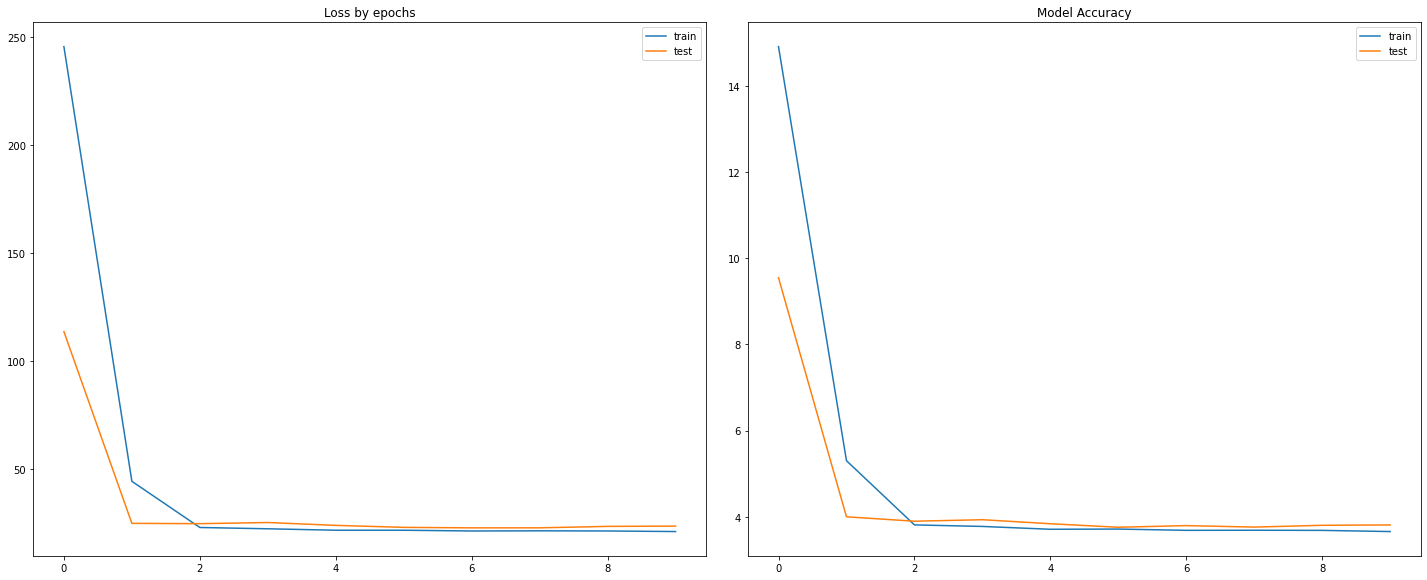

 Now Compiling..... Essay Set 7
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_36 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_121 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_122 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
17/17 [==============================] - 2s 103ms/step - loss: 1370.6769 - mae: 36.5879 - val_loss: 1382.6862 - val_mae: 36.693

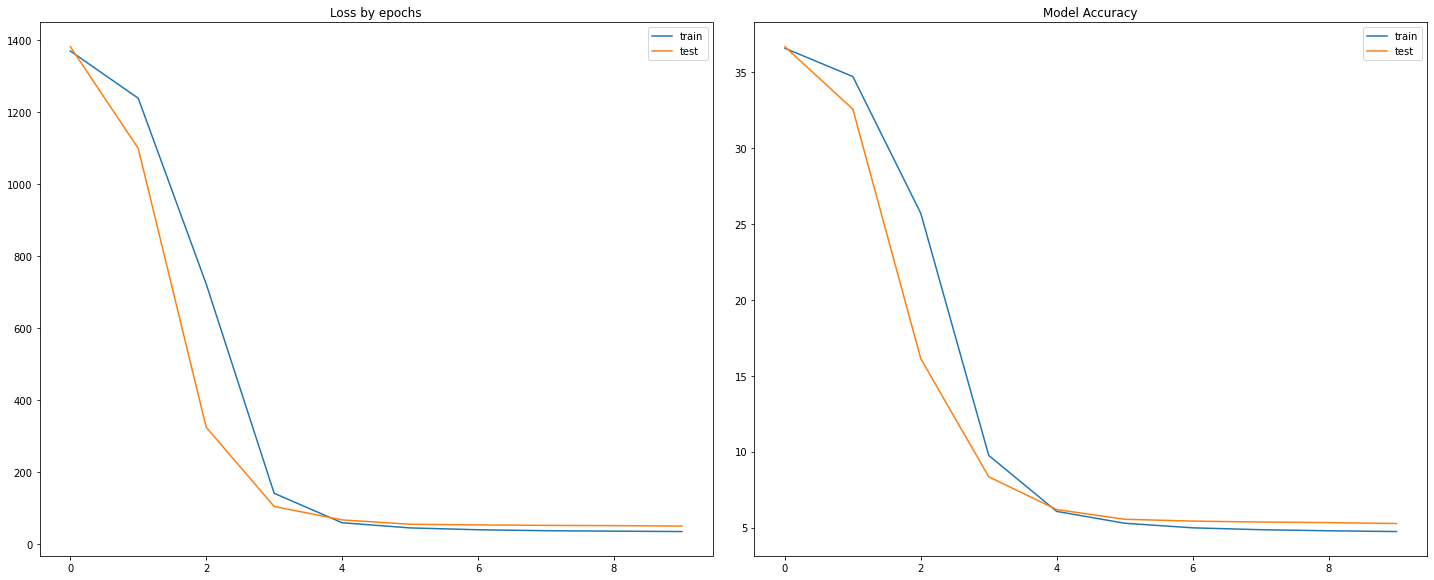

In [177]:
cnnmodel1=[]
history=[]
MAX_NUM_WORDS=15000 
EMBEDDING_DIM=100
for setno in range(0,8):
    cnn = Sequential()
    cnn.add(Embedding(MAX_NUM_WORDS,EMBEDDING_DIM))
    cnn.add(Conv1D(128, 3, input_shape = [len(sequence),450], activation='relu'))
    cnn.add(Dense(32, activation='relu'))
    cnn.add(Dense(1, activation='relu'))
    cnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    print(" Now Compiling..... Essay Set {}".format(setno))
    print(cnn.summary())
    
    x_train, x_val, y_train, y_val = train_test_split(sequences[setno], labels[setno])
    cnn_hist=cnn.fit(x_train, y_train, batch_size=32,  epochs=10, validation_data=(x_val, y_val))
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    fig.tight_layout()

    plt.subplot(121)
    plt.title("Loss by epochs")
    plt.plot(cnn_hist.history['loss'], label='train')
    plt.plot(cnn_hist.history['val_loss'], label='test')
    plt.legend()
    plt.subplot(122)
    plt.title("Model Accuracy")
    plt.plot(cnn_hist.history['mae'], label='train')
    plt.plot(cnn_hist.history['val_mae'], label='test')
    plt.legend()
    plt.show()
    
    path = "./models/CNN1/aes_set_"+str(setno+1)+".h5" 
    cnn.save(path)
    
    cnnmodel1.append(cnn)

In [178]:
training = pd.read_csv('training_set_rel3.tsv', encoding = 'cp437', sep = '\t')
validation = pd.read_csv('valid_set.tsv', encoding = 'cp437', sep = '\t')
test = pd.read_csv('test_set.tsv', encoding = 'cp437', sep = '\t')

In [179]:
test.shape

(4254, 5)

In [180]:
test.head(2)

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN


In [181]:
test_data = clean_essay(test, 'essay', 'essay_processed')

In [182]:
test_data.shape

(4254, 6)

In [183]:
test_data.head(2)

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid,essay_processed
0,2383,1,I believe that computers have a positive effec...,2383,NaN,believe computer positive effect people help s...
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN,dear cap know problem came individual agree be...


In [184]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450

for i in range(0,8):
    dataset.append(test_data[test_data.essay_set==i+1].rename(columns={"domain1_predictionid":"id",
                                                                      "essay_processed":"corpus"}).loc[:,["id","corpus"]])
sequences=[]
answers=[]
for setno in range(0,8):
    sequence=tokenizer[setno].texts_to_sequences(dataset[setno].corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
#     loaded_model = load_model("./models/CNN/aes_set_"+str(setno+1)+".h5")
    answer=cnnmodel1[setno].predict(sequence)
    answers.append(answer)
    dataset[setno]['score'] = answer.tolist()
    dataset[setno]['score'] = dataset[setno]['score'].apply(lambda x: np.round(x[0],0).item())

In [185]:
predictions1 = pd.concat(dataset)

In [186]:
predictions1.shape

(4254, 3)

In [187]:
predictions1.head()

,id,corpus,score
0,2383,believe computer positive effect people help s...,9.0
1,2384,dear cap know problem came individual agree be...,9.0
2,2385,dear month concern computer reason people want...,9.0
3,2386,dear cap cap cap come attention people believe...,9.0
4,2387,dear local newspaper think people lately spent...,9.0


In [188]:
predictions1.score.unique()

array([ 9.,  3.,  2.,  1., 17., 37.])

In [241]:
predictions1.to_csv("CNN_Model_Predicted_Score.csv")

**Compared to the previous model when all the scores were shown as 0, here we see a little better prediction. But when we dig deeper to understand the score, we found that this model does not have the capability to generalize, and score of each essay within a particular essay set is same for all input essays. In order to try and check for a possibility to work with a CNN model with improved accuracy we defined more parameters and controlled the training of model**

## Try to improve accuracy using parameters and epochs

**We continue the same set of steps for preprocessing, model building, processing test data, predicting essay score for all the models, except few changes in the parameters of model configuration**
- ***In the below case we have used more number of epochs, and call back functions to stop the model from training as soon as it start starts overfitting, by monitoring the value of loss and mean absolute error***

In [194]:
dataset = []
for i in range(0,8):
    dataset.append(alldata[alldata.essay_set==i+1].rename(columns={"essay_processed":"corpus",
                                                                   "domain1_score":"score"}).loc[:,["corpus","score"]])
MAX_LEN = 450
tokenizer = []
sequences = []
labels = []
vocabLength = 0
for setno in range(0,8):
    myTokenizer = Tokenizer()
    myTokenizer.fit_on_texts(dataset[setno].corpus) 
    sequence=myTokenizer.texts_to_sequences(dataset[setno].corpus)
    word_index = myTokenizer.word_index 
    print("Sequence Length:",max([len(i) for i in sequence]))
    sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    tokenizer.append(myTokenizer)
    sequences.append(sequence)
    labels.append(np.asarray(dataset[setno].score))
    print("Sequence Length:",max([len(i) for i in sequence]))
    print("Unique words in essay set {} : {}".format(setno,len(word_index)))
    print(" ")
    vocabLength = vocabLength + len(word_index)
    
print(vocabLength)   

Sequence Length: 367
Sequence Length: 450
Unique words in essay set 0 : 14563
 
Sequence Length: 453
Sequence Length: 450
Unique words in essay set 1 : 13282
 
Sequence Length: 179
Sequence Length: 450
Unique words in essay set 2 : 6460
 
Sequence Length: 154
Sequence Length: 450
Unique words in essay set 3 : 4852
 
Sequence Length: 202
Sequence Length: 450
Unique words in essay set 4 : 4617
 
Sequence Length: 208
Sequence Length: 450
Unique words in essay set 5 : 5017
 
Sequence Length: 308
Sequence Length: 450
Unique words in essay set 6 : 10243
 
Sequence Length: 454
Sequence Length: 450
Unique words in essay set 7 : 10937
 
69971


 Now Compiling..... Essay Set 0
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_52 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_45 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_139 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_140 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
42/42 [==============================] - 5s 107ms/step - loss: 46.4483 - mae: 6.2073 - val_loss: 9.1026 - val_mae: 2.6102 - lr:

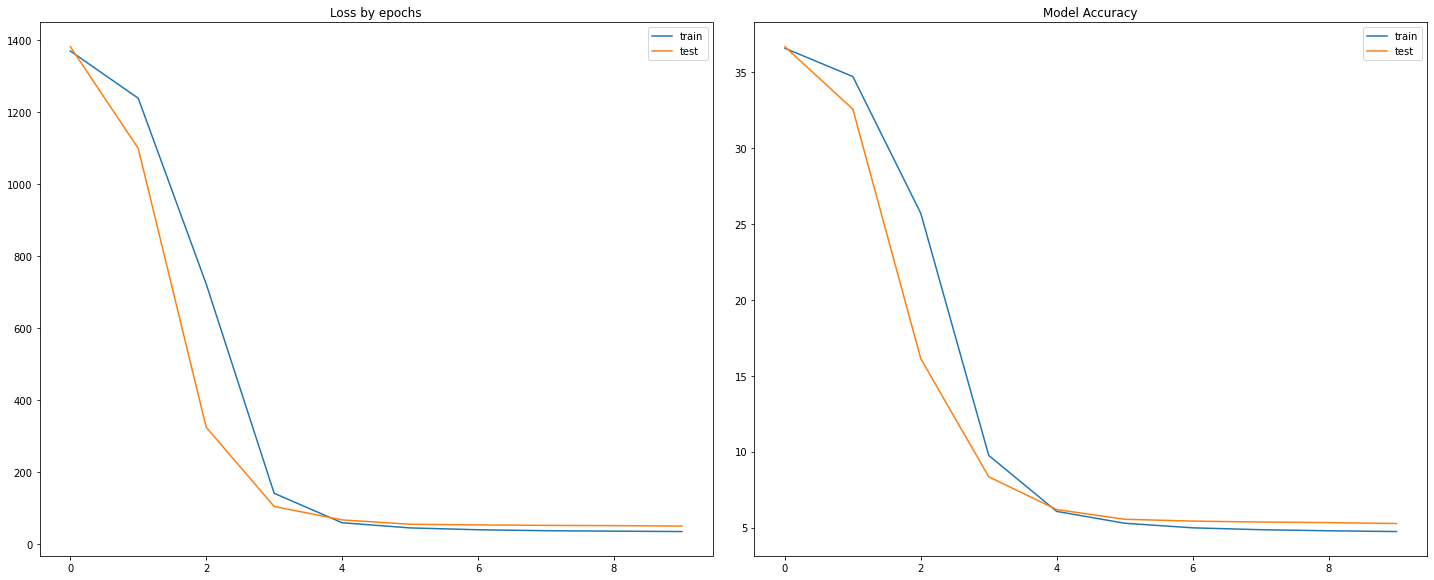

 Now Compiling..... Essay Set 1
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_53 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_46 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_141 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_142 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
43/43 [==============================] - 5s 101ms/step - loss: 4.6368 - mae: 1.7612 - val_loss: 0.8009 - val_mae: 0.6909 - lr: 

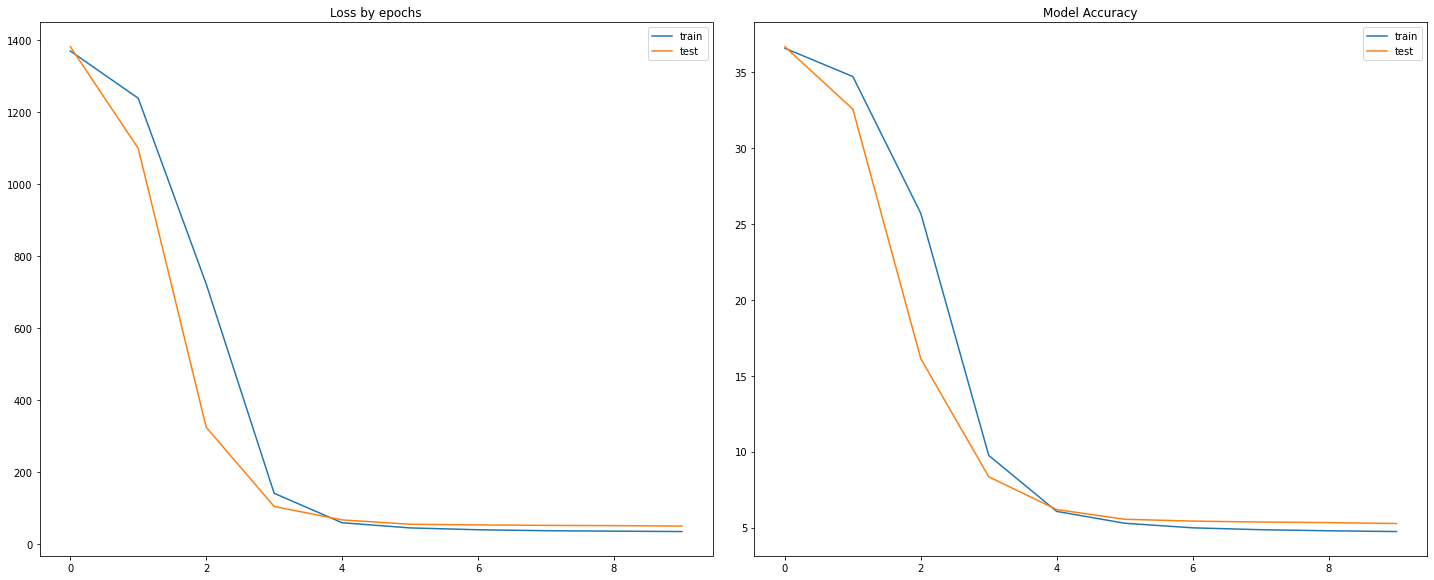

 Now Compiling..... Essay Set 2
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_54 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_47 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_143 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_144 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
41/41 [==============================] - 5s 110ms/step - loss: 1.6672 - mae: 1.0582 - val_loss: 0.7172 - val_mae: 0.7339 - lr: 

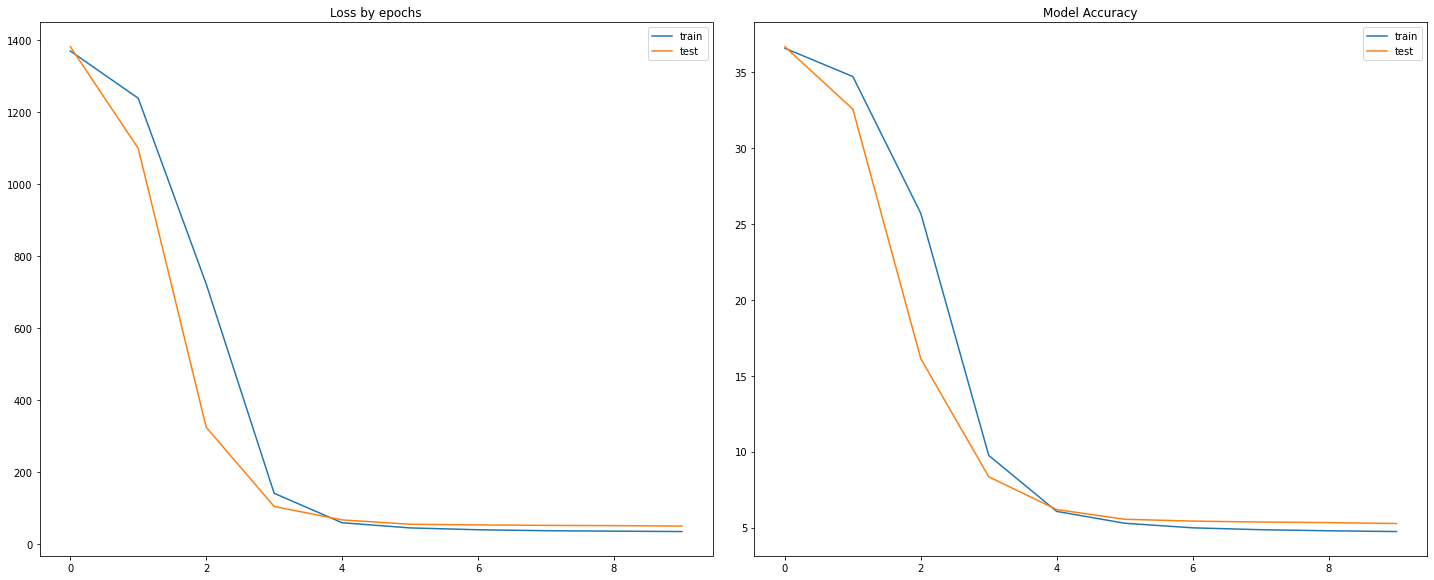

 Now Compiling..... Essay Set 3
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_55 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_48 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_145 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_146 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
42/42 [==============================] - 5s 100ms/step - loss: 1.4372 - mae: 0.9792 - val_loss: 0.8741 - val_mae: 0.7904 - lr: 

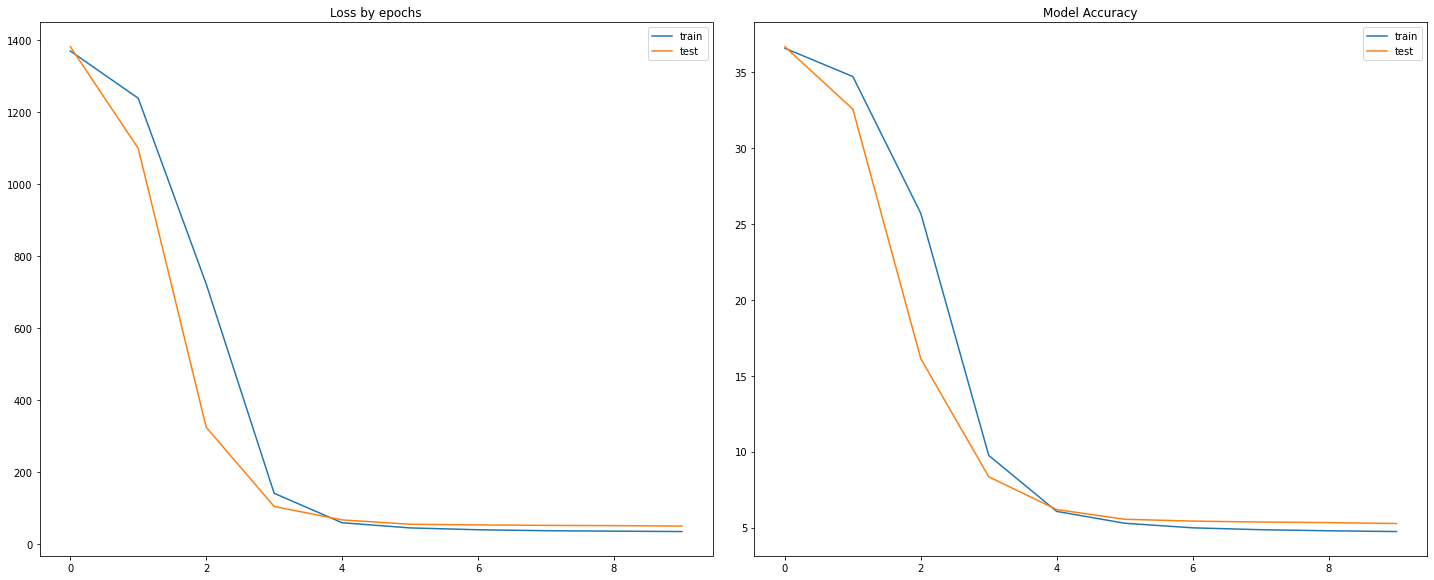

 Now Compiling..... Essay Set 4
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_56 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_49 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_147 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_148 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
43/43 [==============================] - 5s 104ms/step - loss: 3.2186 - mae: 1.4867 - val_loss: 1.0526 - val_mae: 0.8562 - lr: 

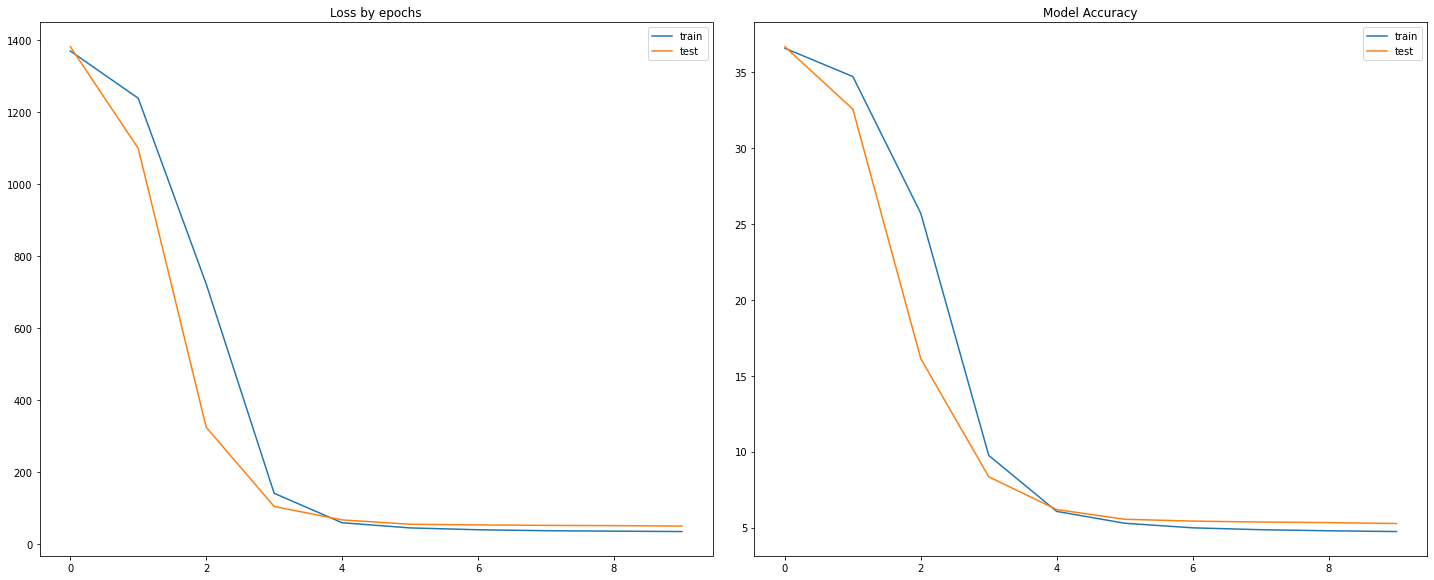

 Now Compiling..... Essay Set 5
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_50 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_149 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_150 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
43/43 [==============================] - 5s 99ms/step - loss: 3.4587 - mae: 1.5376 - val_loss: 1.0451 - val_mae: 0.8621 - lr: 0

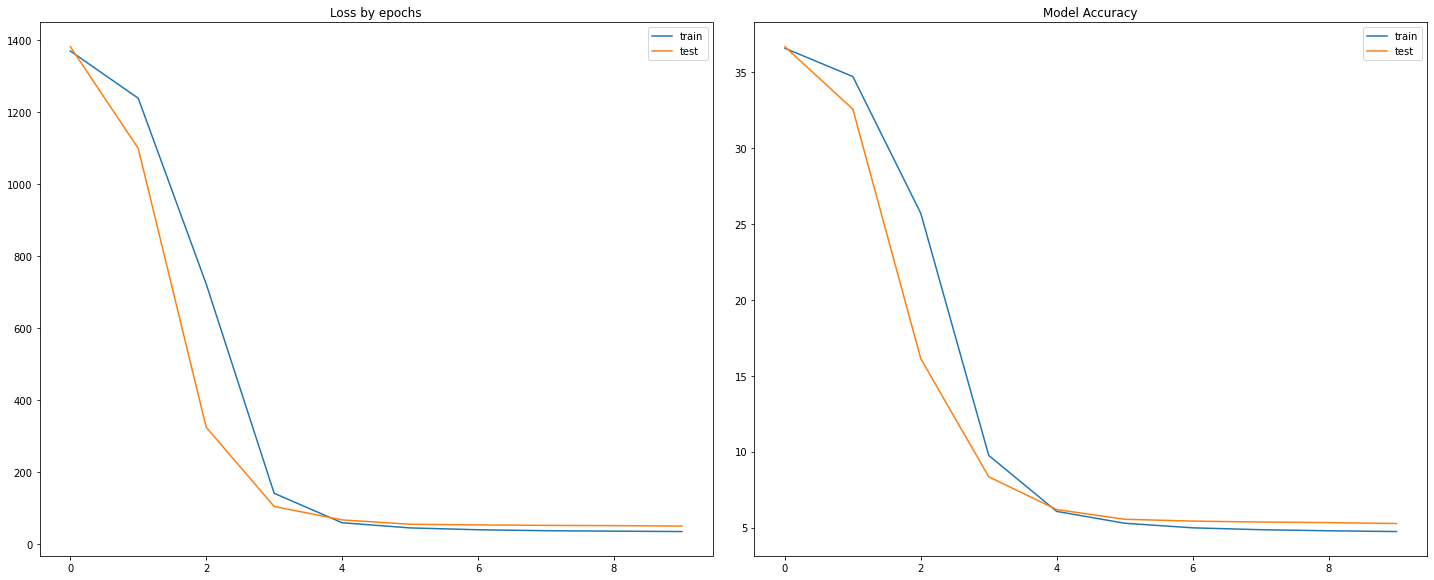

 Now Compiling..... Essay Set 6
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_58 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_51 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_151 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_152 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
37/37 [==============================] - 5s 119ms/step - loss: 200.2436 - mae: 12.9868 - val_loss: 37.8414 - val_mae: 4.8112 - 

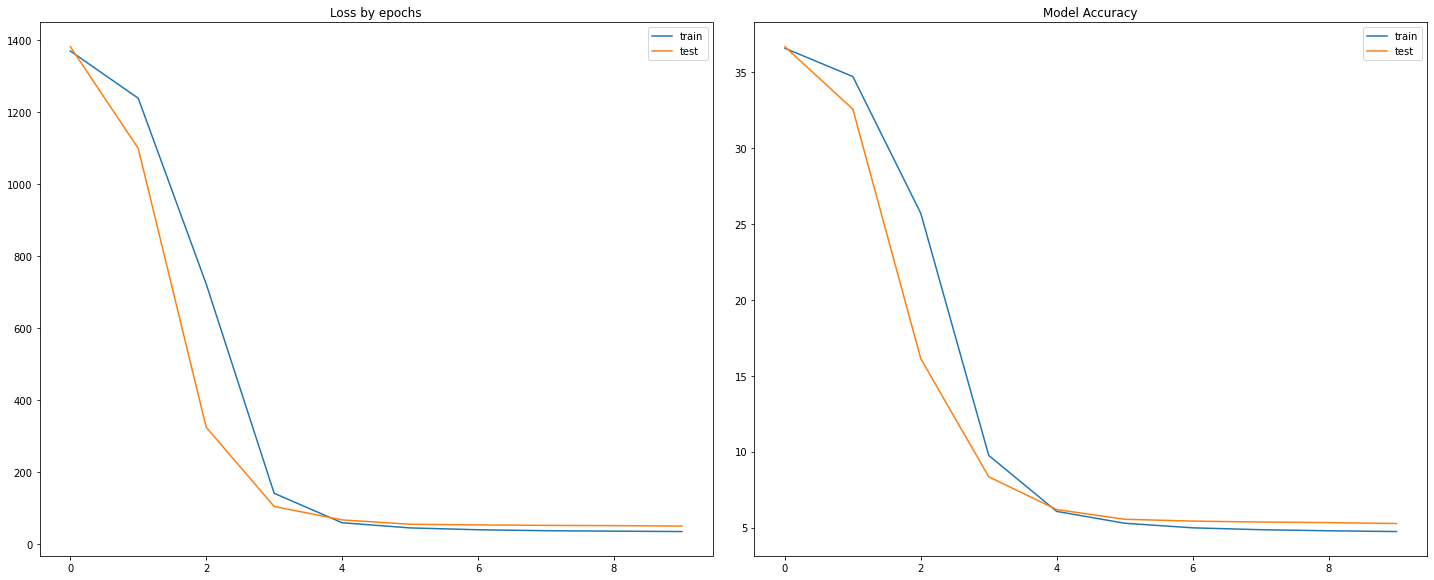

 Now Compiling..... Essay Set 7
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, None, 100)         1500000   
                                                                 
 conv1d_52 (Conv1D)          (None, None, 128)         38528     
                                                                 
 dense_153 (Dense)           (None, None, 32)          4128      
                                                                 
 dense_154 (Dense)           (None, None, 1)           33        
                                                                 
Total params: 1,542,689
Trainable params: 1,542,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
17/17 [==============================] - 2s 108ms/step - loss: 1372.8976 - mae: 36.5868 - val_loss: 1309.5560 - val_mae: 35.765

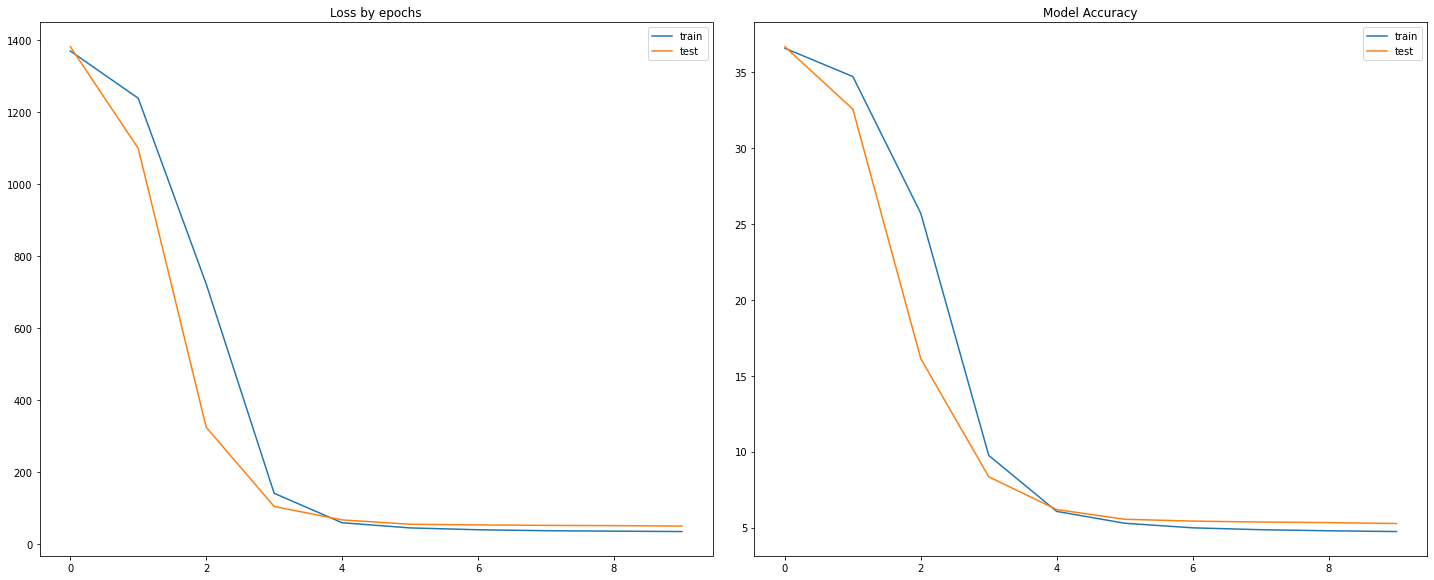

In [195]:
cnnmodel2=[]
history=[]
MAX_NUM_WORDS=15000 
EMBEDDING_DIM=100
for setno in range(0,8):
    cnn1 = Sequential()
    cnn1.add(Embedding(MAX_NUM_WORDS,EMBEDDING_DIM))
    cnn1.add(Conv1D(128, 3, input_shape = [len(sequence),450], activation='relu'))
    cnn1.add(Dense(32, activation='relu'))
    cnn1.add(Dense(1, activation='relu'))
    cnn1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    print(" Now Compiling..... Essay Set {}".format(setno))
    print(cnn1.summary())
    
    x_train, x_val, y_train, y_val = train_test_split(sequences[setno], labels[setno])
    es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=3, min_delta = 0.2)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=3, min_lr=0.001)
    cnn1_hist=cnn1.fit(x_train, y_train, batch_size=32,  epochs=30, validation_data=(x_val, y_val), callbacks=[es,reduce_lr])
    
    print(" Performance of model for Essay Set {}".format(setno))
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    fig.tight_layout()

    plt.subplot(121)
    plt.title("Loss by epochs")
    plt.plot(cnn_hist.history['loss'], label='train')
    plt.plot(cnn_hist.history['val_loss'], label='test')
    plt.legend()
    plt.subplot(122)
    plt.title("Model Accuracy")
    plt.plot(cnn_hist.history['mae'], label='train')
    plt.plot(cnn_hist.history['val_mae'], label='test')
    plt.legend()
    plt.show()
    
    path = "./models/CNN2/aes_set_"+str(setno+1)+".h5" 
    cnn1.save(path)
    cnnmodel2.append(cnn1)

In [196]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450

for i in range(0,8):
    dataset.append(test_data[test_data.essay_set==i+1].rename(columns={"domain1_predictionid":"id",
                                                                      "essay_processed":"corpus"}).loc[:,["id","corpus"]])

sequences=[]
answers=[]
for setno in range(0,8):
    sequence=tokenizer[setno].texts_to_sequences(dataset[setno].corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=cnnmodel2[setno].predict(sequence)
    answers.append(answer)
    dataset[setno]['score'] = answer.tolist()
    dataset[setno]['score'] = dataset[setno]['score'].apply(lambda x: np.round(x[0],0).item())

In [197]:
predictions_30 = pd.concat(dataset)

In [198]:
predictions_30.score.unique()

array([ 9.,  3.,  2.,  1., 16., 37.])

In [199]:
predictions_30.to_csv("CNNModel_Predicted_Score_30Epochs_Controlled.csv")

**Even after working more to reduce error and increase the accuracy of score predicted, the CNN model did not perform as expected and hence we started looking at other options to process the essay data. After much research, we found that LSTM model performs better for textual data, due to its ability to generalize and fill in for the missing values during prediction**

### Use the clean data to convert to sequences and build the corpus for the model

**We continue the same set of steps for preprocessing, model building, processing test data, predicting essay score for all the models, except few changes in the parameters of model configuration**
- ***In the below model we have used LSTM model with dropouts to help the model learn better and understand the relationship between scores and input sequence, by letting it handle the blank values the LSTM way***

In [200]:
dataset = []
for i in range(0,8):
    dataset.append(alldata[alldata.essay_set==i+1].rename(columns={"essay_processed":"corpus",
                                                                   "domain1_score":"score"}).loc[:,["corpus","score"]])
MAX_LEN = 450
tokenizer = []
sequences = []
labels = []
vocabLength = 0
for setno in range(0,8):
    myTokenizer = Tokenizer()
    myTokenizer.fit_on_texts(dataset[setno].corpus) 
    sequence=myTokenizer.texts_to_sequences(dataset[setno].corpus)
    word_index = myTokenizer.word_index 
    print("Sequence Length:",max([len(i) for i in sequence]))
    sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    tokenizer.append(myTokenizer)
    sequences.append(sequence)
    labels.append(np.asarray(dataset[setno].score))
    print("Sequence Length:",max([len(i) for i in sequence]))
    print("Unique words in essay set {} : {}".format(setno,len(word_index)))
    print(" ")
    vocabLength = vocabLength + len(word_index)
    
print(vocabLength)   

Sequence Length: 367
Sequence Length: 450
Unique words in essay set 0 : 14563
 
Sequence Length: 453
Sequence Length: 450
Unique words in essay set 1 : 13282
 
Sequence Length: 179
Sequence Length: 450
Unique words in essay set 2 : 6460
 
Sequence Length: 154
Sequence Length: 450
Unique words in essay set 3 : 4852
 
Sequence Length: 202
Sequence Length: 450
Unique words in essay set 4 : 4617
 
Sequence Length: 208
Sequence Length: 450
Unique words in essay set 5 : 5017
 
Sequence Length: 308
Sequence Length: 450
Unique words in essay set 6 : 10243
 
Sequence Length: 454
Sequence Length: 450
Unique words in essay set 7 : 10937
 
69971


In [201]:
len(sequence)

723

In [127]:
model=[]
history=[]
MAX_NUM_WORDS=15000 
EMBEDDING_DIM=100
for prompt in range(0,8):
    rnnmodel = Sequential()
    rnnmodel.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM))
    rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    rnnmodel.add(Dense(32, activation='relu'))
    rnnmodel.add(Dense(1, activation='relu'))
    rnnmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    print(rnnmodel.summary())
    fold = 0
    for train_index, test_index in KFold(3,shuffle=True).split(sequences[prompt]):
        print('\n Prompt ',prompt+1,' Fold ',fold+1)
        x_train, x_val = sequences[prompt][train_index], sequences[prompt][test_index]
        y_train, y_val = labels[prompt][train_index], labels[prompt][test_index]
        his=rnnmodel.fit(x_train, y_train, batch_size=32,  epochs=10, validation_data=(x_val, y_val))
        
        history.append(his)
        fold+=1
        
    path = "./models/LSTM/aes_set_"+str(prompt+1)+".h5" 
    rnnmodel.save(path)
        
    model.append(rnnmodel)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1500000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_33 (Dense)            (None, 32)                4128      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,621,409
Trainable params: 1,621,409
Non-trainable params: 0
_________________________________________________________________
None

 Prompt  1  Fold  1
Epoch 1/10
38/38 [==============================] - 52s 1s/step - loss: 20.8192 - mae: 3.2454 - val_loss: 2.4559 - val_mae: 1.2210
Epoch 2/10
38/38 [=

38/38 [==============================] - 40s 1s/step - loss: 0.0291 - mae: 0.1290 - val_loss: 0.1632 - val_mae: 0.3233
Epoch 9/10
38/38 [==============================] - 41s 1s/step - loss: 0.0249 - mae: 0.1216 - val_loss: 0.1676 - val_mae: 0.3295
Epoch 10/10
38/38 [==============================] - 41s 1s/step - loss: 0.0204 - mae: 0.1091 - val_loss: 0.1526 - val_mae: 0.3098

 Prompt  2  Fold  3
Epoch 1/10
38/38 [==============================] - 41s 1s/step - loss: 0.0965 - mae: 0.2312 - val_loss: 0.0275 - val_mae: 0.1298
Epoch 2/10
38/38 [==============================] - 43s 1s/step - loss: 0.0560 - mae: 0.1813 - val_loss: 0.0304 - val_mae: 0.1364
Epoch 3/10
38/38 [==============================] - 42s 1s/step - loss: 0.0374 - mae: 0.1474 - val_loss: 0.0294 - val_mae: 0.1328
Epoch 4/10
38/38 [==============================] - 43s 1s/step - loss: 0.0270 - mae: 0.1207 - val_loss: 0.0320 - val_mae: 0.1374
Epoch 5/10
38/38 [==============================] - 43s 1s/step - loss: 0.0258 

37/37 [==============================] - 39s 1s/step - loss: 0.1182 - mae: 0.2588 - val_loss: 0.3231 - val_mae: 0.4408
Epoch 6/10
37/37 [==============================] - 40s 1s/step - loss: 0.0907 - mae: 0.2208 - val_loss: 0.3183 - val_mae: 0.4440
Epoch 7/10
37/37 [==============================] - 39s 1s/step - loss: 0.0755 - mae: 0.1971 - val_loss: 0.3708 - val_mae: 0.4727
Epoch 8/10
37/37 [==============================] - 40s 1s/step - loss: 0.0624 - mae: 0.1741 - val_loss: 0.3436 - val_mae: 0.4576
Epoch 9/10
37/37 [==============================] - 39s 1s/step - loss: 0.0496 - mae: 0.1537 - val_loss: 0.3562 - val_mae: 0.4651
Epoch 10/10
37/37 [==============================] - 39s 1s/step - loss: 0.0428 - mae: 0.1392 - val_loss: 0.3588 - val_mae: 0.4615

 Prompt  4  Fold  2
Epoch 1/10
37/37 [==============================] - 39s 1s/step - loss: 0.2022 - mae: 0.3225 - val_loss: 0.0930 - val_mae: 0.2278
Epoch 2/10
37/37 [==============================] - 39s 1s/step - loss: 0.1019 

Epoch 10/10
38/38 [==============================] - 50s 1s/step - loss: 0.0276 - mae: 0.1263 - val_loss: 0.0836 - val_mae: 0.2306
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         1500000   
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dense_43 (Dense)            (None, 32)                4128      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,621,409
Trainable params: 1,621,409
Non-trainable params: 0
_________________________________________________________________
None

 Prompt  6  Fold  1
Epoch 1/10
38/38 [

33/33 [==============================] - 45s 1s/step - loss: 9.1678 - mae: 2.1762 - val_loss: 13.1831 - val_mae: 2.7991
Epoch 8/10
33/33 [==============================] - 45s 1s/step - loss: 7.9344 - mae: 2.0111 - val_loss: 12.2306 - val_mae: 2.6865
Epoch 9/10
33/33 [==============================] - 45s 1s/step - loss: 6.2968 - mae: 1.8288 - val_loss: 11.4260 - val_mae: 2.6320
Epoch 10/10
33/33 [==============================] - 46s 1s/step - loss: 4.5012 - mae: 1.5852 - val_loss: 10.1241 - val_mae: 2.4974

 Prompt  7  Fold  3
Epoch 1/10
33/33 [==============================] - 45s 1s/step - loss: 6.8810 - mae: 1.9803 - val_loss: 3.2224 - val_mae: 1.3495
Epoch 2/10
33/33 [==============================] - 45s 1s/step - loss: 4.4264 - mae: 1.5834 - val_loss: 3.9931 - val_mae: 1.5594
Epoch 3/10
33/33 [==============================] - 47s 1s/step - loss: 3.0172 - mae: 1.3131 - val_loss: 3.5730 - val_mae: 1.4645
Epoch 4/10
33/33 [==============================] - 46s 1s/step - loss: 2.1

In [128]:
model

In [129]:
test = pd.read_csv('test_set.tsv', encoding = 'cp437', sep = '\t')

In [130]:
test_data = clean_essay(test, 'essay', 'essay_processed')

In [131]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450

for i in range(0,8):
    dataset.append(test_data[test_data.essay_set==i+1].rename(columns={"domain1_predictionid":"id",
                                                                      "essay_processed":"corpus"}).loc[:,["id","corpus"]])

sequences=[]
answers=[]
for setno in range(0,8):
    sequence=tokenizer[setno].texts_to_sequences(dataset[setno].corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=model[setno].predict(sequence)
    answers.append(answer)
    dataset[setno]['score'] = answer.tolist()
    dataset[setno]['score'] = dataset[setno]['score'].apply(lambda x: np.round(x[0],0).item())

In [132]:
predicted = pd.concat(dataset)

In [133]:
predicted.shape

(4254, 3)

In [136]:
predicted.sample(10)

,id,corpus,score
423,2807,local newspaper month concern iv seeing people...,0.0
2419,17304,memoir think mood kind sad charecter missis ho...,2.0
3675,23296,sister going gull dow farm wanted trakter ride...,8.0
617,7824,library community book people population appro...,3.0
2652,17537,mood created author memoir think happiness kno...,2.0
3058,20344,project builder empire state building face obs...,2.0
3847,23523,date patience paciently waiting frost volley b...,19.0
1863,14341,like cap cant wait see snow melting goose retu...,2.0
3994,23704,stood example friend sibiling cousin know stoo...,23.0
3265,20551,short story mooring mast organization reader g...,4.0


In [135]:
predicted.score.unique()

array([ 0.,  3.,  4.,  1.,  5.,  2., 15., 14., 23., 13., 20., 10., 19.,
       11., 17., 21., 12., 18., 16., 22.,  8.,  9.,  7.,  6., 24., 37.,
       36.])

In [239]:
predicted.to_csv("LSTM_FinalModel_Predicted_Score.csv")

#### Create  Function to take an input essay, and provide score to the user.

In [137]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450
sequences=[]
answers=[]

def get_essay_score(text,setno):
    path = "./models/LSTM/aes_set_"+str(setno)+".h5" 
    model = keras.models.load_model(path)
    test = pd.DataFrame([[setno,text]],columns=['essay_set','essay'])
    
    test_data = clean_essay(test, 'essay', 'corpus')
    myTokenizer = Tokenizer() 
    myTokenizer.fit_on_texts(test_data.corpus)

    sequence=myTokenizer.texts_to_sequences(test_data.corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=model.predict(sequence)
    answer = np.round(answer.value)
    
    return answer


In [148]:
text = input("Enter your Input Essay:")
setno = int(input("Enter the Set Grouping:"))

Enter your Input Essay:In this memoir I think that the mood is kind of sad. The charecter missis his home. For example the last paragraph (paragraph @NUM1) It says It was in the warmth of the kitchen in this humble house where a cuban feast (albeit a frugal cuban feast) Always filled the air with not just scent and music but life and love. It was here that I learned the real deffinition of family. And for this, I will never forget that house or its gracious naborhood or the many things I learned there about how to love. This shows how the charecter feels about his home and how the mood was the memories he missis in them
Enter the Set Grouping:5


In [149]:
print("The score of your input essay is:",get_essay_score(text,setno).item())

The score of your input essay is: 2.0


**This model has the best result so far, with a mean absolute error ranging from 0.2 to 1.2 for essay sets 1 to 7. But for essay set 8, we still see that the mean absolute error is around 4.2. Although this makes sense a little since the range of essay score for essay set 8 is between 0 to 60, we wanted to try and reduce the error further and handle the overfitting that is happening for essay set 1.** 

### Improve the accuracy of LSTM model by having control over training of data

**We continue the same set of steps for preprocessing, model building, processing test data, predicting essay score for all the models, except few changes in the parameters of model configuration**
- ***In the below case we have used more number of epochs, and call back functions to stop the model from training as soon as it start starts overfitting, by monitoring the value of loss and mean absolute error for every 3 epochs by a delta change in  MAE of 0.2***

In [202]:
dataset = []
for i in range(0,8):
    dataset.append(alldata[alldata.essay_set==i+1].rename(columns={"essay_processed":"corpus",
                                                                   "domain1_score":"score"}).loc[:,["corpus","score"]])
MAX_LEN = 450
tokenizer = []
sequences = []
labels = []
vocabLength = 0
for setno in range(0,8):
    myTokenizer = Tokenizer()
    myTokenizer.fit_on_texts(dataset[setno].corpus) 
    sequence=myTokenizer.texts_to_sequences(dataset[setno].corpus)
    word_index = myTokenizer.word_index 
    print("Sequence Length:",max([len(i) for i in sequence]))
    sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    tokenizer.append(myTokenizer)
    sequences.append(sequence)
    labels.append(np.asarray(dataset[setno].score))
    print("Sequence Length:",max([len(i) for i in sequence]))
    print("Unique words in essay set {} : {}".format(setno,len(word_index)))
    print(" ")
    vocabLength = vocabLength + len(word_index)
    
print(vocabLength)   

Sequence Length: 367
Sequence Length: 450
Unique words in essay set 0 : 14563
 
Sequence Length: 453
Sequence Length: 450
Unique words in essay set 1 : 13282
 
Sequence Length: 179
Sequence Length: 450
Unique words in essay set 2 : 6460
 
Sequence Length: 154
Sequence Length: 450
Unique words in essay set 3 : 4852
 
Sequence Length: 202
Sequence Length: 450
Unique words in essay set 4 : 4617
 
Sequence Length: 208
Sequence Length: 450
Unique words in essay set 5 : 5017
 
Sequence Length: 308
Sequence Length: 450
Unique words in essay set 6 : 10243
 
Sequence Length: 454
Sequence Length: 450
Unique words in essay set 7 : 10937
 
69971


In [203]:
len(sequence)

723

In [204]:
lstmmodel=[]
history=[]
MAX_NUM_WORDS=15000 
EMBEDDING_DIM=100
for prompt in range(0,8):
    rnnmodel = Sequential()
    rnnmodel.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM))
    rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    rnnmodel.add(Dense(32, activation='relu'))
    rnnmodel.add(Dense(1, activation='relu'))
    rnnmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    print(rnnmodel.summary())
    fold = 0
    for train_index, test_index in KFold(3,shuffle=True).split(sequences[prompt]):
        print('\n Prompt ',prompt+1,' Fold ',fold+1)
        x_train, x_val = sequences[prompt][train_index], sequences[prompt][test_index]
        y_train, y_val = labels[prompt][train_index], labels[prompt][test_index]
        es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=3, min_delta = 0.2)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=3, min_lr=0.001)
        his=rnnmodel.fit(x_train, y_train, batch_size=32,  epochs=10, validation_data=(x_val, y_val),callbacks=[es,reduce_lr])
        
        history.append(his)
        fold+=1
        
    path = "./models/LSTM1/aes_set_"+str(prompt+1)+".h5" 
    rnnmodel.save(path)
        
    lstmmodel.append(rnnmodel)

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_60 (Embedding)    (None, None, 100)         1500000   
                                                                 
 lstm_8 (LSTM)               (None, 128)               117248    
                                                                 
 dense_155 (Dense)           (None, 32)                4128      
                                                                 
 dense_156 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,621,409
Trainable params: 1,621,409
Non-trainable params: 0
_________________________________________________________________
None

 Prompt  1  Fold  1
Epoch 1/10
38/38 [==============================] - 52s 1s/step - loss: 22.4536 - mae: 3.4362 - val_loss: 2.8097 - val_mae: 1.2020 - lr: 0.0010
Epoch

36/36 [==============================] - 55s 2s/step - loss: 0.0510 - mae: 0.1678 - val_loss: 0.0603 - val_mae: 0.1857 - lr: 0.0010
Epoch 4/10
36/36 [==============================] - 55s 2s/step - loss: 0.0388 - mae: 0.1434 - val_loss: 0.0592 - val_mae: 0.1819 - lr: 0.0010
Epoch 00004: early stopping
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_63 (Embedding)    (None, None, 100)         1500000   
                                                                 
 lstm_11 (LSTM)              (None, 128)               117248    
                                                                 
 dense_161 (Dense)           (None, 32)                4128      
                                                                 
 dense_162 (Dense)           (None, 1)                 33        
                                                                 
Total params: 

Epoch 00006: early stopping

 Prompt  6  Fold  2
Epoch 1/10
38/38 [==============================] - 61s 2s/step - loss: 0.2210 - mae: 0.3696 - val_loss: 0.0999 - val_mae: 0.2512 - lr: 0.0010
Epoch 2/10
38/38 [==============================] - 61s 2s/step - loss: 0.1318 - mae: 0.2867 - val_loss: 0.0975 - val_mae: 0.2397 - lr: 0.0010
Epoch 3/10
38/38 [==============================] - 62s 2s/step - loss: 0.0960 - mae: 0.2390 - val_loss: 0.1115 - val_mae: 0.2592 - lr: 0.0010
Epoch 4/10
38/38 [==============================] - 61s 2s/step - loss: 0.0793 - mae: 0.2118 - val_loss: 0.1653 - val_mae: 0.3155 - lr: 0.0010
Epoch 00004: early stopping

 Prompt  6  Fold  3
Epoch 1/10
38/38 [==============================] - 61s 2s/step - loss: 0.1088 - mae: 0.2578 - val_loss: 0.0519 - val_mae: 0.1728 - lr: 0.0010
Epoch 2/10
38/38 [==============================] - 61s 2s/step - loss: 0.0830 - mae: 0.2192 - val_loss: 0.0606 - val_mae: 0.1869 - lr: 0.0010
Epoch 3/10
38/38 [==========================

In [205]:
lstmmodel

In [206]:
test = pd.read_csv('test_set.tsv', encoding = 'cp437', sep = '\t')

In [207]:
test_data = clean_essay(test, 'essay', 'essay_processed')

In [209]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450

for i in range(0,8):
    dataset.append(test_data[test_data.essay_set==i+1].rename(columns={"domain1_predictionid":"id",
                                                                      "essay_processed":"corpus"}).loc[:,["id","corpus"]])

sequences=[]
answers=[]
for setno in range(0,8):
    sequence=tokenizer[setno].texts_to_sequences(dataset[setno].corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=lstmmodel[setno].predict(sequence)
    answers.append(answer)
    dataset[setno]['score'] = answer.tolist()
    dataset[setno]['score'] = dataset[setno]['score'].apply(lambda x: np.round(x[0],0).item())

In [210]:
predictedlstm = pd.concat(dataset)

In [211]:
predictedlstm.shape

(4254, 3)

In [212]:
predictedlstm.sample(10)

,id,corpus,score
3069,20355,builder empire state building faced obstacle a...,3.0
1286,11379,feature setting affect cyclist way landscape d...,2.0
1607,11707,heat water deserted reason setting affected cy...,2.0
4019,24962,personally think laughter important life laugh...,37.0
1235,11327,solo cyclist journey face trouble mainly deal ...,3.0
2336,14815,author cocludes story paragraph showed saeng s...,1.0
3035,20321,builder empire state building obstacle overcom...,4.0
2339,14818,author concludes story paragraph saeng wasnæt ...,1.0
2035,14514,believe think good luck goose end passing driv...,1.0
4234,25223,family laughter cap family love laughter thing...,37.0


In [213]:
predictedlstm.score.unique()

array([ 9., 10.,  7.,  8.,  6.,  5., 11.,  3.,  4.,  1.,  2.,  0., 14.,
       15., 20., 16., 17., 19., 13., 18., 12., 21., 22., 37.])

In [237]:
predictedlstm.to_csv("LSTM_Model_Predicted_Score.csv")

#### Create a function to predict score from the saved model

In [217]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450
sequences=[]
answers=[]

def get_essay_score(text,setno):
    path = "./models/LSTM1/aes_set_"+str(setno)+".h5" 
    model = keras.models.load_model(path)
    test = pd.DataFrame([[setno,text]],columns=['essay_set','essay'])
    
    test_data = clean_essay(test, 'essay', 'corpus')
    myTokenizer = Tokenizer() 
    myTokenizer.fit_on_texts(test_data.corpus)

    sequence=myTokenizer.texts_to_sequences(test_data.corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=model.predict(sequence)
    answer = np.round(answer.item())
    
    return answer


In [218]:
text = input("Enter your Input Essay:")
setno = int(input("Enter the Set Grouping:"))

Enter your Input Essay: Personally, I think laughter is a very important part in life. If you never laugh, in my opinion, you never live. If you live your life completely seriously with no jokes to laugh at, where'@CAPS13 the fun? They say laughter is the best medicine. This I agree with. Yes, sometimes when you are sick or injured, when you laugh, it @CAPS1 physically hurt, but I think laughter is the best medicine because sometimes it @CAPS1 help take your mind off the pain and move your thoughts to a more positive topic, like a joke, a story, or old memories.  I @CAPS3 a very outgoing person who loves to smile, laugh and have a good time living life. I couldn't @CAPS2 to tell all the stories that have made me laugh, or even some of the best ones. Most of the time they take too long, or I end up laughing in the middle of telling the story. I had a hard time think of which story I should tell and I'm still @CAPS11 sure. But what I @CAPS3 sure of is that laughing makes life a whole @CA

In [219]:
print("The score of your input essay is:",get_essay_score(text,setno).item())

The score of your input essay is: 37.0


**We stopped the model from overfitting at this stage, we can see for essay set 1, as soon as the MAE reaches greater than 1.2, the model stops. But for essay set 8, we still find a MAE of around 4. To combat this issue, we tried using 5 folds in the K fold cross validation to hold out a lesser amount of data and help the model learn efficiently**

### Improve the accuracy of LSTM model by increasing folds during CV

**We continue the same set of steps for preprocessing, model building, processing test data, predicting essay score for all the models, except few changes in the parameters of model configuration**
- ***In the below model we have use 5 folds in the KFold CV splitting instead of 3, hopinfg to train the model in a better manner***

In [220]:
dataset = []
for i in range(0,8):
    dataset.append(alldata[alldata.essay_set==i+1].rename(columns={"essay_processed":"corpus",
                                                                   "domain1_score":"score"}).loc[:,["corpus","score"]])
MAX_LEN = 450
tokenizer = []
sequences = []
labels = []
vocabLength = 0
for setno in range(0,8):
    myTokenizer = Tokenizer()
    myTokenizer.fit_on_texts(dataset[setno].corpus) 
    sequence=myTokenizer.texts_to_sequences(dataset[setno].corpus)
    word_index = myTokenizer.word_index 
    print("Sequence Length:",max([len(i) for i in sequence]))
    sequence = pad_sequences(sequence, maxlen=MAX_LEN)
    tokenizer.append(myTokenizer)
    sequences.append(sequence)
    labels.append(np.asarray(dataset[setno].score))
    print("Sequence Length:",max([len(i) for i in sequence]))
    print("Unique words in essay set {} : {}".format(setno,len(word_index)))
    print(" ")
    vocabLength = vocabLength + len(word_index)
    
print(vocabLength)   

Sequence Length: 367
Sequence Length: 450
Unique words in essay set 0 : 14563
 
Sequence Length: 453
Sequence Length: 450
Unique words in essay set 1 : 13282
 
Sequence Length: 179
Sequence Length: 450
Unique words in essay set 2 : 6460
 
Sequence Length: 154
Sequence Length: 450
Unique words in essay set 3 : 4852
 
Sequence Length: 202
Sequence Length: 450
Unique words in essay set 4 : 4617
 
Sequence Length: 208
Sequence Length: 450
Unique words in essay set 5 : 5017
 
Sequence Length: 308
Sequence Length: 450
Unique words in essay set 6 : 10243
 
Sequence Length: 454
Sequence Length: 450
Unique words in essay set 7 : 10937
 
69971


In [203]:
len(sequence)

723

In [223]:
lstmmodel1=[]
history=[]
MAX_NUM_WORDS=15000 
EMBEDDING_DIM=100
for prompt in range(0,8):
    rnnmodel = Sequential()
    rnnmodel.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM))
    rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    rnnmodel.add(Dense(32, activation='relu'))
    rnnmodel.add(Dense(1, activation='relu'))
    rnnmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    print(rnnmodel.summary())
    fold = 0
    for train_index, test_index in KFold(5,shuffle=True).split(sequences[prompt]):
        print('\n Prompt ',prompt+1,' Fold ',fold+1)
        x_train, x_val = sequences[prompt][train_index], sequences[prompt][test_index]
        y_train, y_val = labels[prompt][train_index], labels[prompt][test_index]
        es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=3, min_delta = 0.2)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=3, min_lr=0.001)
        his=rnnmodel.fit(x_train, y_train, batch_size=32,  epochs=10, validation_data=(x_val, y_val),callbacks=[es,reduce_lr])
        
        history.append(his)
        fold+=1
        
    path = "./models/LSTM2/aes_set_"+str(prompt+1)+".h5" 
    rnnmodel.save(path)
        
    lstmmodel1.append(rnnmodel)

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_74 (Embedding)    (None, None, 100)         1500000   
                                                                 
 lstm_22 (LSTM)              (None, 128)               117248    
                                                                 
 dense_183 (Dense)           (None, 32)                4128      
                                                                 
 dense_184 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,621,409
Trainable params: 1,621,409
Non-trainable params: 0
_________________________________________________________________
None

 Prompt  1  Fold  1
Epoch 1/10
45/45 [==============================] - 85s 2s/step - loss: 19.3723 - mae: 3.1072 - val_loss: 2.2640 - val_mae: 1.1795 - lr: 0.0010
Epoch

44/44 [==============================] - 89s 2s/step - loss: 1.4009 - mae: 0.9399 - val_loss: 0.7158 - val_mae: 0.6841 - lr: 0.0010
Epoch 2/10
44/44 [==============================] - 84s 2s/step - loss: 0.4768 - mae: 0.5519 - val_loss: 0.3931 - val_mae: 0.5036 - lr: 0.0010
Epoch 3/10
44/44 [==============================] - 82s 2s/step - loss: 0.2468 - mae: 0.3839 - val_loss: 0.3903 - val_mae: 0.5013 - lr: 0.0010
Epoch 4/10
44/44 [==============================] - 84s 2s/step - loss: 0.1629 - mae: 0.3007 - val_loss: 0.4303 - val_mae: 0.5137 - lr: 0.0010
Epoch 00004: early stopping

 Prompt  3  Fold  2
Epoch 1/10
44/44 [==============================] - 83s 2s/step - loss: 0.1994 - mae: 0.3255 - val_loss: 0.1561 - val_mae: 0.2896 - lr: 0.0010
Epoch 2/10
44/44 [==============================] - 83s 2s/step - loss: 0.1688 - mae: 0.3140 - val_loss: 0.1556 - val_mae: 0.2774 - lr: 0.0010
Epoch 3/10
44/44 [==============================] - 83s 2s/step - loss: 0.0915 - mae: 0.2227 - val_loss:

46/46 [==============================] - 104s 2s/step - loss: 2.1680 - mae: 1.1521 - val_loss: 0.9698 - val_mae: 0.8324 - lr: 0.0010
Epoch 2/10
46/46 [==============================] - 92s 2s/step - loss: 0.9396 - mae: 0.8173 - val_loss: 0.8872 - val_mae: 0.8064 - lr: 0.0010
Epoch 3/10
46/46 [==============================] - 97s 2s/step - loss: 0.8987 - mae: 0.7891 - val_loss: 0.8503 - val_mae: 0.7839 - lr: 0.0010
Epoch 4/10
46/46 [==============================] - 97s 2s/step - loss: 1.0227 - mae: 0.7617 - val_loss: 0.7370 - val_mae: 0.6907 - lr: 0.0010
Epoch 00004: early stopping

 Prompt  5  Fold  2
Epoch 1/10
46/46 [==============================] - 88s 2s/step - loss: 0.4993 - mae: 0.5612 - val_loss: 0.3134 - val_mae: 0.4503 - lr: 0.0010
Epoch 2/10
46/46 [==============================] - 93s 2s/step - loss: 0.2750 - mae: 0.4163 - val_loss: 0.3855 - val_mae: 0.5174 - lr: 0.0010
Epoch 3/10
46/46 [==============================] - 93s 2s/step - loss: 0.2047 - mae: 0.3609 - val_loss

40/40 [==============================] - 83s 2s/step - loss: 93.2341 - mae: 7.4506 - val_loss: 22.4865 - val_mae: 3.8176 - lr: 0.0010
Epoch 2/10
40/40 [==============================] - 78s 2s/step - loss: 21.2360 - mae: 3.7052 - val_loss: 22.2766 - val_mae: 3.7646 - lr: 0.0010
Epoch 3/10
40/40 [==============================] - 78s 2s/step - loss: 20.7942 - mae: 3.6509 - val_loss: 22.2986 - val_mae: 3.7740 - lr: 0.0010
Epoch 4/10
40/40 [==============================] - 78s 2s/step - loss: 20.5098 - mae: 3.6278 - val_loss: 22.6488 - val_mae: 3.8509 - lr: 0.0010
Epoch 00004: early stopping

 Prompt  7  Fold  2
Epoch 1/10
40/40 [==============================] - 79s 2s/step - loss: 21.1224 - mae: 3.6885 - val_loss: 17.5398 - val_mae: 3.2844 - lr: 0.0010
Epoch 2/10
40/40 [==============================] - 78s 2s/step - loss: 19.3477 - mae: 3.5144 - val_loss: 17.6086 - val_mae: 3.2684 - lr: 0.0010
Epoch 3/10
40/40 [==============================] - 79s 2s/step - loss: 17.1023 - mae: 3.249

In [224]:
lstmmodel1

In [225]:
test = pd.read_csv('test_set.tsv', encoding = 'cp437', sep = '\t')

In [226]:
test_data = clean_essay(test, 'essay', 'essay_processed')

In [227]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450

for i in range(0,8):
    dataset.append(test_data[test_data.essay_set==i+1].rename(columns={"domain1_predictionid":"id",
                                                                      "essay_processed":"corpus"}).loc[:,["id","corpus"]])

sequences=[]
answers=[]
for setno in range(0,8):
    sequence=tokenizer[setno].texts_to_sequences(dataset[setno].corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=lstmmodel1[setno].predict(sequence)
    answers.append(answer)
    dataset[setno]['score'] = answer.tolist()
    dataset[setno]['score'] = dataset[setno]['score'].apply(lambda x: np.round(x[0],0).item())

In [228]:
predictedlstm1 = pd.concat(dataset)

In [229]:
predictedlstm1.shape

(4254, 3)

In [230]:
predictedlstm1.sample(10)

,id,corpus,score
3843,23515,far away magical place called cap land ruled c...,0.0
1468,11564,feature setting affect cyclist way old men tol...,1.0
3456,20742,fufill dream docking drigibles empire state bu...,3.0
110,2493,dear local newspaper cap opinion concern effec...,8.0
2070,14549,author concludes story paragraph stateing ôwhe...,1.0
4219,25207,started morning mom told going location week c...,37.0
1150,8890,censorship library important thing young child...,4.0
2198,14677,author concludes story paragraph ôwhen come sa...,2.0
3984,23692,day person person walk country flower bloom pr...,0.0
4084,25036,time life thing difficult hard found thing har...,37.0


In [231]:
predictedlstm1.score.unique()

array([ 8.,  9.,  7.,  6., 10., 11., 12.,  5.,  4.,  3.,  1.,  2.,  0.,
       37.])

In [238]:
predictedlstm1.to_csv("LSTM_Model_CV_Predicted_Score.csv")

In [232]:
dataset=[]
idx=0
MAX_SEQUENCE_LENGTH=450
sequences=[]
answers=[]

def get_essay_score(text,setno):
    path = "./models/LSTM2/aes_set_"+str(setno)+".h5" 
    model = keras.models.load_model(path)
    test = pd.DataFrame([[setno,text]],columns=['essay_set','essay'])
    
    test_data = clean_essay(test, 'essay', 'corpus')
    myTokenizer = Tokenizer() 
    myTokenizer.fit_on_texts(test_data.corpus)

    sequence=myTokenizer.texts_to_sequences(test_data.corpus)
    sequence= pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
    answer=model.predict(sequence)
    answer = np.round(answer.item())
    
    return answer


In [235]:
text = input("Enter your Input Essay:")
setno = int(input("Enter the Set Grouping:"))

Enter your Input Essay:How does one fufill the dream of docking drigibles on top of the Empire State Building? Although it is possible, multiple obstacles had risen. As stated in The Mooring Mast "The steel frame of the Empire State Building would have to be modified and strengthened to accommodate this new situation." For one to begin starting this project, many modifications would have to be made to the buildings framework. This could total up "over sixty thousand dollars'" just to begin the project. Before the mooring mast was even brought up, the whole roof needed to be completed. "The building had been framed to the 85th floor, the roof had to be completed before the framing for the mooring mast could take place." Without the roof being completed, one could not even start on the mooring mast. This roof was a big obstacle to get around while completing the tower. "The greatest obstacle to the successful use of mooring mast was nature itself." @CAPS1 "violent winds" were shifting ai

In [236]:
print("The score of your input essay is:",get_essay_score(text,setno).item())

The score of your input essay is: 4.0


**By using 5 folds for training the data and holding out small samples, we had aimed to acheive a better model accuracy. But instead the predictability of the model declined and the number of unique score had reduced when compared to the previous models. Not only this, but it also couls not reduce the MAE value for essay set 8. Hence we decided to go with the previous LSTM model as the final one for this project.**